# Introduction

This notebook will serve to answer three questions using the StackoverFlow survey data between 2011 and 2020 using the CRISP-DM process.

The questions are:
1. How are developers with no CS background represented in the job market? 
2. What non degree education (online courses, bootcamps, etc..) do data scientists focus on?
3. Is salary the reason of job dissatisfaction or are there other reasons?


The notebook will apply the CRISP-DM process with each question separately.

# How are developers with no CS background represented in the job market?

# Overview of the CRISP-DM process for this question

### Business Understanding

This question can help us understand the possibility of being a professional developer today without having a CS background. 

Also it can help us understand how the tides of the job market are shifting, and whether the proportion of these developers is decreasing or increasing, and whether a CS degree is necessary in the field right now or not.

### Data Understaning

To answer this question, I need to download the data of each year's survey, then I need to find columns related to employement and background education in each survey, then find the proportion of CS and non CS majors for professional (employed) developers in each year. 

### Data Preparation 

That will require alot of cleaning of the data in order to make into one format. First I have to find a column that represents employement within each survey, then I have to filter for only employed respondents. After that I have to find a column that represents background education, and I then I have get it inot a format that represents the general type of background education, whether it was non CS, CS (undergrad and postgrad).

### Data Modelling

Plotting visualizations of the data to analyze the compoisition of the market in each year's survey/


### Results

Answering the question and discussing the implications of the answer and the final conclusion.


Now I'll download the data and begin by exploring each year and getting a broad picture about the quality of the data.




### Import the necessary libraries

In [1]:
import requests
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

In [2]:
# make dir to save downloaded zip files, extracted data and plots
os.mkdir('downloads')
os.mkdir('data')
os.mkdir('imgs')

### Download the data

In [3]:
# download the data
zip_url = {'2011_survey.zip': 'https://drive.google.com/uc?export=download&id=0Bx0LyhBTBZQgUGVYaGx3SzdUQ1U',
           '2012_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrX3JaZWVwWEpHNWM',
           '2013_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrenpPNTc5UE1PYW8',
           '2014_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrempjMktvWFNaQzA',
           '2015_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsra1psanV1MEdxZk0',
           '2016_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrV0VldnVIT1hyb0E',
           '2017_survey.zip': 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM',
           '2018_survey.zip': 'https://drive.google.com/uc?export=download&id=1_9On2-nsBQIw3JiY43sWbrF8EjrqrR4U',
           '2019_survey.zip': 'https://drive.google.com/uc?export=download&id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV',
           '2020_survey.zip': 'https://drive.google.com/uc?export=download&id=1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB'}

for zip_file, url in zip_url.items():
    r = requests.get(url)
    with open('downloads/'+zip_file, 'wb') as code:
        code.write(r.content)
    print('Downloaded', zip_file)

Downloaded 2011_survey.zip
Downloaded 2012_survey.zip
Downloaded 2013_survey.zip
Downloaded 2014_survey.zip
Downloaded 2015_survey.zip
Downloaded 2016_survey.zip
Downloaded 2017_survey.zip
Downloaded 2018_survey.zip
Downloaded 2019_survey.zip
Downloaded 2020_survey.zip


### Extract the data 

In [4]:
# make a folder for each zip file
zip_dir = {zip_file: zip_file.rstrip('.zip') for zip_file in zip_url.keys()}
for dir in zip_dir.values():
    try:
        os.mkdir('data/'+dir)
    except:
        continue

In [5]:
# extract each zip file in its folder
for zip_file, dir in zip_dir.items():
    with ZipFile('downloads/'+zip_file, 'r') as zipObj:
        zipObj.extractall('data/'+dir)

### Read the data using pandas 

In [6]:
# read the data
df_2011 = pd.read_csv('data/2011_survey/2011 Stack Overflow Survey Results.csv', encoding = "ISO-8859-1")
df_2012 = pd.read_csv('data/2012_survey/2012 Stack Overflow Survey Results.csv', encoding = "ISO-8859-1")
df_2013 = pd.read_csv('data/2013_survey/2013 Stack Overflow Survey Responses.csv')
df_2014 = pd.read_csv('data/2014_survey/2014 Stack Overflow Survey Responses.csv')
df_2015 = pd.read_csv('data/2015_survey/2015 Stack Overflow Developer Survey Responses.csv')
df_2016 = pd.read_csv('data/2016_survey/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2017 = pd.read_csv('data/2017_survey/survey_results_public.csv')
df_2018 = pd.read_csv('data/2018_survey/survey_results_public.csv')
df_2019 = pd.read_csv('data/2019_survey/survey_results_public.csv')
df_2020 = pd.read_csv('data/2020_survey/survey_results_public.csv')

schema_2017 = pd.read_csv('data/2017_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2018 = pd.read_csv('data/2018_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2019 = pd.read_csv('data/2019_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2020 = pd.read_csv('data/2020_survey/survey_results_schema.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [7]:
df_2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What types of purchases are you involved in?,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What type of project are you developing?,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Response,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,None,other (please specify),Response,Response,Response,iPhone,Android,Blackberry,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,Blu-Ray,HDTV,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Haskell,Linux,I enjoy going to work,Student / Unemployed,NaN,NaN,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


There is no question for undergraduate education in the 2011 survey so we can pass on.

In [8]:
df_2012.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,What types of purchases are you involved in?,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",What type of project are you developing?,Which languages are you proficient in?,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Which desktop operating system do you use the most?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Have you visited / Are you aware of Stack Overflow Careers?,Do you have a Stack Overflow Careers Profile?,"You answered you don't have a Careers profile, can you elaborate why?",Unnamed: 43,Which technology products do you own? (You can choose more than one),Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
0,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,Response,Response,Java,JavaScript,CSS,PHP,Python,Objective-C,Ruby,SQL,C#,C++,C,Perl,HTML5,None,Other (please specify),Response,Response,Response,Response,Response,Response,Other (please specify),iPhone,Android,Blackberry,Windows Phone,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,AppleTV,Boxee,Other media streaming device,Netbook,PS3,Xbox,Wii,Other gaming system,Kindle Fire,iPad,Other tablet,Other (please specify),Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,What ads? I use an ad blocker,Open-Ended Response,Response,Response,Other Stack Exchange (please specify)
1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,NaN,NaN,NaN,NaN,NaN,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,NaN,"<$10,000",SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN,C++,C,NaN,NaN,NaN,NaN,Linux,Love my job,"<$20,000",Yes,"No, but I want one! (Please provide email and ...",NaN,NaN,iPhone,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$501-$1,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,Consultants,NaN,Don't know,Mobile,NaN,JavaScript,CSS,PHP,NaN,Objective-C,NaN,NaN,NaN,C++,NaN,NaN,HTML5,NaN,NaN,Windows 7,I enjoy going to work,"$20,000 - $40,000",No,No thank you,Thought Careers site was just about finding a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100-$250,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Ov

Same goes for the 2012 survey.

In [9]:
df_2013.head().head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,How many people work for your company?,Which of the following best describes your occupation?,"Including yourself, how many developers are employed at your company?",How large is the team that you work on?,What other departments / roles do you interact with regularly?,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,"If your company has a native mobile app, what platforms do you support?",Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,"If you make a software product, how does your company make money? (You can choose more than one)",Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,"In an average week, how do you spend your time?",Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Have you changed jobs in the last 12 months?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Please rate the advertising you've seen on Stack Overflow,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,Response,Response,Response,Response,Response,Response,Response,Response,Response,System Administrators,Designers,Product Managers,Testers / Quality Assurance,Technical Support,Sales / Marketing,Consultants,Customers,Finance,Human Resources,iPhone,iPad,Android phone,Android tablet,Blackberry,Other,No mobile app,Advertising,Direct sales to consumers,Direct sales to companies,Software as a service / recurring billing,Mobile app sales,Consulting,Grants / outside fund-raising,Other,Developing new features,Refactoring / code quality,Fixing bugs,Technical support,Meetings,Learning new skills,...,"High Quality Office Space (amenities, lounge s...",High Caliber Team (is everyone else smart/hard...,Positive Organization Structure (not much bure...,Lots of Control Over Your Own Work,"Quality of Workstation (dream machine, 30inch ...",Autonomy Over Budget/Expenditures,Office in a Desirable City/Area,Convenient Commute or Telecommute Options,40 hour work week,Limited night / weekend work,Response,Response,Response,iPhone,Android,Blackberry,Windows Phone,iPad,Android Tablet,Kindle Fire,Windows Tablet,Kindle,Nook,PS3,Xbox,Wii,Other (please specify),Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,What ads? I use an ad blocker,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Other (please specify)
1,United Kingdom,NaN,35-39,6/10/2013,Finance / Banking,101-999,Enterprise Level Services,100,4/8/2013,System Administrators,Designers,Product Managers,Testers / Quality Assurance,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,iPad,Android phone,NaN,Blackberry,Other,NaN,NaN,NaN,Direct sales to companies,NaN,NaN,Consulting,NaN,NaN,10-20 hours,5-10 hours,10-20 hours,5-10 hours,5-10 hours,2-5 hours,...,Somewhat Important,Somewhat Important,Somewhat Important,Somewhat Important,Not Very Important,Don't Care,Very Important,Very Important,Non-Negot

And 2013 survey also.

In [10]:
df_2014.head()

,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,Do you work remotely?,Do you enjoy working remotely?,Where do you work remotely most of the time?,"If your company has a native mobile app, what platforms do you support?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"In an average week, how do you spend your time at work?",Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,What types of purchases are you involved in?,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 80,Unnamed: 81,Have you changed jobs in the last 12 months?,How did you find out about your current job?,Unnamed: 84,Are you currently looking for a job or open to new opportunities?,How often are you contacted by recruiters?,How do you prefer to be contacted about job opportunities?,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,"In receiving an email about a job opportunity, what attributes of the message would make you more likely to respond?",Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,How often do you visit job boards?,Have you visited / Are you aware of Stack Overflow Careers 2.0?,Do you have a Stack Overflow Careers 2.0 Profile?,Please rate the advertising you've seen on Stack Overflow,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Were you aware of the Apptivate contest?,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,Response,Other (please specify),Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,iPhone,iPad,Android Phone,Android Tablet,Windows Phone,Other,No mobile app,Developing new features,Refactoring / code quality,Fixing bugs,Technical support,Meetings,Learning new skills,Surfing the Internet,Looking for a new job,Using Stack Exchange,I can recommend or request products,"I influence purchasing decisions, but don't ha...",I have a discretionary budget at my disposal,I can buy anything I want without asking anyone,No Involvement,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Recruitment Tools & Services,...,Wii U,Other (please specify),Response,Response,Other (please specify),Response,Response,Email,LinkedIn Inmail,Phone,Stack Overflow Careers Message,Twitter,Message is personalized to me,Mentions my code or Stack Overflow activity,Includes salary information,Describes the team I will work on,Describes company culture,Describes benefits / perks of the work environ...,Link to a Stack Overflow Careers Company Page ...,Response,Response,Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,I like that I can indicate ads I want to see l...,What ads? I use an ad blocker,Response,Response,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Looking for a job,Build my online reputation,Other (please specify),Response
1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance

And 2014. 

In [11]:
df_2015.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Select all that apply,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Select all that apply.5,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Select all that apply.6,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Select all that apply.7,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
0,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,Current Lang & Tech: AngularJS,Current Lang & Tech: C,Current Lang & Tech: C++,Current Lang & Tech: C++11,Current Lang & Tech: C#,Current Lang & Tech: Cassandra,Current Lang & Tech: CoffeeScript,Current Lang & Tech: Cordova,Current Lang & Tech: Clojure,Current Lang & Tech: Cloud,Current Lang & Tech: Dart,Current Lang & Tech: F#,Current Lang & Tech: Go,Current Lang & Tech: Hadoop,Current Lang & Tech: Haskell,Current Lang & Tech: iOS,Current Lang & Tech: Java,Current Lang & Tech: JavaScript,Current Lang & Tech: LAMP,Current Lang & Tech: Matlab,Current Lang & Tech: MongoDB,Current Lang & Tech: Node.js,Current Lang & Tech: Objective-C,Current Lang & Tech: Perl,Current Lang & Tech: PHP,Current Lang & Tech: Python,Current Lang & Tech: R,Current Lang & Tech: Redis,Current Lang & Tech: Ruby,Current Lang & Tech: Rust,...,Why try Stack Overflow Careers: Showcase Stack...,Why try Stack Overflow Careers: Jobs are on St...,Why try Stack Overflow Careers: Other,How many caffeinated beverages per day?,How many hours programming as hobby per week?,How frequently land on or read Stack Overflow,Preferred text editor,Preferred text editor: write-in,Prefered IDE theme,Source control used: Git,Source control used: Mercurial,Source control used: SVN,Source control used: CVS,Source control used: Perforce,Source control used: TFS,Source control used: DCVS,Source control used: Bitkeeper,Source control used: Legacy / Custom,Source control used: I don't use source control,Source control used: write-in,Prefered Source Control,Prefered Source Control: write-in,Why use Stack Overflow: Help for job,Why use Stack Overflow: To give help,Why use Stack Overflow: Can't do job without it,Why use Stack Overflow: Maintain online presence,Why use Stack Overflow: Demonstrate expertise,Why use Stack Overflow: Communicate with others,Why use Stack Overflow: Receive help on person...,Why use Stack Overflow: Love to learn,Why use Stack Overflow: I don't use Stack Over...,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,To showcase my Stack Overflow activity,Because the jobs ads are right there on Stack ...,NaN,0,5-10 hours per week,Multipleætimes a day,Sublime Text,NaN,Dark,NaN,Mercurial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercurial,NaN,To get help for my job,To give hel

### Data Understanding

In [12]:
# statistical summary of the data
df_2015.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Select all that apply,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Select all that apply.5,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Select all that apply.6,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Select all that apply.7,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
count,25280,25832,25745,25808,24828,20852,21981,791,4111,1627,2914,3613,4530,1852,6950,203,784,629,177,1411,110,175,463,343,358,1957,8220,11963,1927,861,1746,2920,1720,739,6530,5239,756,874,1766,104,...,2470,3298,1129,16511,16517,16514,14058,2716,16468,11573,1326,6150,695,559,2030,27,58,382,1563,533,15272,358,11816,9101,3359,2350,2690,2803,6640,10755,206,16394,10231,8664,4827,3319,5176,1023,703,5701
unique,157,10,5,5,6,25,11,325,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,12,7,7,9,875,4,2,2,2,2,2,2,2,2,2,2,268,10,263,2,2,2,2,2,2,2,2,2,6,2,2,2,2,2,2,2,2
top,United States,25-29,Male,Tabs,2 - 5 years,Full-stack web developer,Windows 7,Arch Linux,Android,Arduino / Raspberry Pi,AngularJS,C,C++,C++11,C#,Cassandra,CoffeeScript,Cordova,Clojure,"Cloud (AWS, GAE, Azure, etc.)",Dart,F#,Go,Hadoop,Haskell,iOS,Java,JavaScript,LAMP,Matlab,MongoDB,Node.js,Objective-C,Perl,PHP,Python,R,Redis,Ruby,Rust,...,To showcase my Stack Overflow activity,Because the jobs ads are right there on Stack ...,Other,0,2-5 hours per week,Multipleætimes a day,NotePad++,Visual Studio,Dark,Git,Mercurial,SVN,CVS,Perforce,TFS,DCVS,BitKeeper,Legacy / Custom,I don't use source control,ClearCase,Git,None,To get help for my job,To give help to others,Because I can't do my job without it,To maintain an online presence,To demonstrate that I'm good at what I do,To communicate with others like me,To receive help onæmy personal projects,Because I love to learn,I don't really use Stack Overflow. I just take...,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,I have no idea why I answer but I do it anyway,"I don't answer much (or at all), and I don't w...","I don't answer much (or at all), but I want to..."
freq,4745,7365,23699,11604,8037,6765,7700,101,4110,1626,2913,3612,4529,1851,6949,202,783,628,176,1410,109,174,462,342,357,1956,8219,11962,1926,860,1745,2919,1719,738,6529,5238,755,873,1765,103,...,2469,3297,1128,3916,4524,10800,5809,180,8637,11572,1325,6149,694,558,2029,26,57,381,1562,45,11271,10,11815,9100,3358,2349,2689,2802,6639,10754,205,12453,10230,8663,4826,3318,5175,1022,702,5700


The 2015 survey only has categorical features. And the features (questions) are stored in the first row, so we need a way to access these features and search for education and employments related ones.

In [13]:
# questions are stored in the first row of the data
q_2015 = df_2015.iloc[0]

# search the features for ones related to education
q_2015[q_2015.str.contains('Edu')]

Select all that apply.2             Training & Education: No formal training
Unnamed: 95                                 Training & Education: On the job
Unnamed: 96                  Training & Education: Boot camp or night school
Unnamed: 97                               Training & Education: Online Class
Unnamed: 98                                 Training & Education: Mentorship
Unnamed: 99                     Training & Education: Industry certification
Unnamed: 100               Training & Education: Some college, but no CS ...
Unnamed: 101                                  Training & Education: BS in CS
Unnamed: 102                             Training & Education: Masters in CS
Unnamed: 103                                 Training & Education: PhD in CS
Unnamed: 104                                     Training & Education: Other
Name: 0, dtype: object

Columns starting from 94 to 104 are the only column related to education in the survey, and they have the information about college background that we need.


In [14]:
df_2015.iloc[:, 94:105]

,Select all that apply.2,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,Training & Education: No formal training,Training & Education: On the job,Training & Education: Boot camp or night school,Training & Education: Online Class,Training & Education: Mentorship,Training & Education: Industry certification,"Training & Education: Some college, but no CS ...",Training & Education: BS in CS,Training & Education: Masters in CS,Training & Education: PhD in CS,Training & Education: Other
1,NaN,On-the-job training,NaN,"Online class (ie. Coursera, Codecademy, Khan A...",NaN,NaN,NaN,NaN,Masters Degree in Computer Science (or related...,NaN,NaN
2,NaN,NaN,NaN,"Online class (ie. Coursera, Codecademy, Khan A...",NaN,Industry certification program,NaN,NaN,Masters Degree in Computer Science (or related...,NaN,NaN
3,NaN,NaN,NaN,NaN,"Mentorship program (ie. Flatiron School, GDI, ...",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,On-the-job training,NaN,NaN,"Mentorship program (ie. Flatiron School, GDI, ...",NaN,NaN,Bachelor of Science in Computer Science (or re...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look into the number of respondents who didn't answer any of the education questions.

In [15]:
df_2015.iloc[1:, 94:105].isnull().all(axis=1).sum()

4774

We have 4774 respondents who didn't answer any questions related to education so we need to drop these respondents to have more accurate analysis. 

If we didn't drop them they would be grouped with non CS background respondents, as they wouldn't have selected having a CS bachelors, MS or PhD, which could not be correct as they might have had one of those but didn't complete the survey, or preferred not to answer these questions.

So as discussed before, I'll take the counts of all employed developers in non-CS degrees, with CS BS or CS postgraduate studies (MS or PhD).

So I need to find the feature that represents the respondent's current employment status.

In [16]:
# search for columns that have answers about current employment
q_2015[q_2015.str.contains('Emp')]

Unnamed: 107    Employment Status
Name: 0, dtype: object

In [17]:
# find out the unique values and their counts
df_2015.iloc[:, 107].value_counts()

Employed full-time        14126
I'm a student              3379
Freelance / Contractor     1911
Employed part-time          901
Unemployed                  432
Prefer not to disclose      259
Other                       242
Retired                      54
Employment Status             1
Name: Unnamed: 107, dtype: int64

We can see that most repondents are full-time employees.

### Data Cleaning

At first, I though that I should take full-time, part-time and freelancers to indicate current employment, but then I thought that free-lancing isn't particularly related to the job market, as I want to look into the percentage of employment in companies.

So I'll filter out full and part-time employed respondents from this survey (and the next surveys).

In [18]:
# filter repondents who have only selected these two values
emp_statuses = ['Employed full-time', 'Employed part-time']
emp_2015 = df_2015.iloc[1:][df_2015.iloc[1:, 107].isin(emp_statuses)]

In [19]:
# drop education null respondents
edu_null = emp_2015.iloc[:, 94:105].isnull().all(axis=1)
emp_2015 = emp_2015[~edu_null]

Now we need to count them according to their degrees.

For this analysis, I'll consider anyone who didn't take a CS degree a person with a non CS background, whether they graduated from college or not.

Then I'll count those with CS bachelors degrees into a group, and those with higher degrees (MS and PhD) in a third group.

In [20]:
# make several flags to divide respondents into those with BS, MS or PhD in CS
is_bs = emp_2015.iloc[:, 101].notnull()
is_ms = emp_2015.iloc[:, 102].notnull()
is_phd = emp_2015.iloc[:, 103].notnull()

# filter out the groups 
emp_non_cs_2015 = emp_2015[~is_bs & ~is_ms & ~is_phd]
emp_cs_bs_2015 = emp_2015[is_bs & ~is_ms & ~is_phd]
emp_cs_pg_2015 = emp_2015[is_ms | is_phd]
emp_cs_2015 = emp_2015[is_bs | is_ms | is_phd]

# count non CS, CS and higher CS background
non_cs_count = emp_non_cs_2015.shape[0]
cs_count = emp_cs_bs_2015.shape[0] + emp_cs_pg_2015.shape[0]
cs_bs_count = emp_cs_bs_2015.shape[0]
cs_pg_count = emp_cs_pg_2015.shape[0]

# sanity check
assert (non_cs_count + cs_count) == emp_2015.shape[0]

In [21]:
# make a dataframe to hold the final results of the 2015 survye
dg_2015 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2015

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,6297,8680,5285,3395


Now let's look into the 2016 survey.

### Data Understanding

In [22]:
df_2016.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,"Mobile Dev (Android, iOS, WP & Multi-Platform)",6 - 10 years,8.0,"$40,000 - $50,000",45000.0,NaN,iOS; Objective-C,Swift,Yes,7.0,Employed full-time,Consulting,100-499 employees,15-20 people,3,I rarely work remotely,I love my job,I knew I wanted to work here. I sought out the...,TextMate; Xcode,Multiple times a day,1-2 hours per week,Cats,Mac OS X,No,1,Multiple times a day,To keep my skills up to date,I'm self-taught; On-the-job training; B.S. in ...,I am not interested in new job opportunities,Salary; Ability to make or influence important...,Taking time off work to interview,10%,Show me more live code; Introduce me to the te...,Star Wars,Agree completely,Agree completely,Agree completely,Agree somewhat,Agree completely,Neutral,Agree somewhat,Neutral,Agree somewhat,Disagree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,DevOps,11+ years,13.0,"Less than $10,000",5000.0,NaN,NaN,NaN,Other (please specify),8.0,Freelance / Contractor,Finance / Banking,100-499 employees,1-4 people,2,Part-time remote,I love my job,Other,Visual Studio,Multiple times a day,2-5 hours per week,Cats,Other Linux,Yes,I'm not sure,Once a week,NaN,I'm self-taught; On-the-job training,"I'm not actively looking, but I am open to new...",Office location; Remote working option; Flexib...,Other (please specify),0%,Be more flexible about interview scheduling; O...,NaN,Agree completely,Neutral,Agree somewhat,Agree somewhat,Agree completely,Disagree completely,Disagree completely,Agree completely,Agree somewhat,Disagree completely,This is somewhat important,I don't care about this,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn


We can see that the data is structured in a different way from the 2015 survey, where now each column has a name.

Let's take a look into a summary of the data.

In [23]:
df_2016.describe(include=['O'])

,collector,country,un_subregion,so_region,age_range,gender,self_identification,occupation,occupation_group,experience_range,salary_range,tech_do,tech_want,aliens,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
count,56030,55528,55313,55390,55727,55586,54202,49519,46934,49520,46121,49025,47952,49177,49576,40110,39932,39962,39808,40118,40110,40027,45713,46598,46673,45239,46451,46657,46143,46154,46145,44955,44380,43658,42851,42263,41041,34398,42662,42755,42659,42505,42627,42692,42096,42613,42382,42685,42628,42572,42531,42604,42538,42580,42483,42529,42582,42538,41096,41793
unique,6,175,20,14,9,4,1723,27,21,5,24,19139,24294,3,9,21,12,8,15,4,7,13,4656,7,7,3,11,4,9,6,7,997,3,14390,9,12,487,3,5,5,5,5,5,5,5,5,5,5,3,3,3,3,3,3,3,3,3,3,8253,553
top,Meta Stack Overflow Post,United States,North America,Western Europe,25-29,Male,Developer,Full-stack web developer,Full-stack web developer,2 - 5 years,"Less than $10,000",Java,C#,Yes,Employed full-time,Software Products,20-99 employees,1-4 people,0,I rarely work remotely,I'm somewhat satisfied with my job,A friend referred me,Notepad++; Visual Studio,Multiple times a day,2-5 hours per week,Dogs,Mac OS X,Yes,2 - 100,Multiple times a day,I want to be a better developer,I'm self-taught,"I'm not actively looking, but I am open to new...",Salary; Work/life balance; Company culture,The interview process,50%,Show me more live code; Introduce me to the te...,Star Wars,Agree somewhat,Agree completely,Agree completely,Agree completely,Agree completely,Disagree completely,Neutral,Agree somewhat,Agree somewhat,Disagree completely,This is somewhat important,This is somewhat important,I don't care about this,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,Limited resources,To get help for my job
freq,28177,13539,15565,19157,15702,51388,5763,13886,13886,15897,7686,843,538,25742,33593,8916,8616,15659,15929,19212,16413,10819,2928,26574,12090,22101,12150,29973,8930,26058,16236,6197,27848,521,7481,6213,1493,22410,19493,20337,30347,17424,17373,22199,17097,13287,11624,21567,22273,20026,20302,29848,27336,21452,20200,19067,19572,20276,362,3893


We can see that contrary to the 2015 survey, this one has qunatitative variables. However they won't be of much use for us now since we are currently looking only at employment and education related features.

So let's figure out where these features ares.

In [24]:
# store the columns separately to keep the convention we used in 2015 survey
q_2016 = df_2016.columns

# search for columns related to employment
q_2016[q_2016.str.contains('emp')]

Index(['employment_status'], dtype='object')

We have a straightforward feature that tells us the employment status of the respondents.

In [25]:
df_2016['employment_status'].value_counts()

Employed full-time        33593
I'm a student              6269
Freelance / Contractor     3509
Self-employed              2122
Employed part-time         1752
Unemployed                  915
Other (please specify)      911
Prefer not to disclose      387
Retired                     118
Name: employment_status, dtype: int64

The same pattern as in 2015 here is preset, where the top category in employements status is full-time employment, followed by being a students and then freelancing.

Now let's for features related to education.

In [26]:
q_2016[q_2016.str.contains('edu')]

Index(['education'], dtype='object')

In [27]:
df_2016['education'].value_counts()

I'm self-taught                                                                                                                                                                                                                                                                              6197
B.S. in Computer Science (or related field)                                                                                                                                                                                                                                                  3607
I'm self-taught; On-the-job training                                                                                                                                                                                                                                                         2490
Masters Degree in Computer Science (or related field)                                                                             

We can see that this was a question in the survey where you could have selected multiple choices. So we'll need a way to split each of these choices into separate rows in order to aggregate them and understand what exactly are the values in this feature.

In [28]:
from itertools import chain
from collections import Counter

def split_and_count(data):
    """Function to split a column that has multiple values in string format
    in each row into separate rows."""
    split_data = data.str.split(';')
    chain_data = chain.from_iterable(split_data.dropna().tolist())
    chain_data = map(lambda x: x.strip(), chain_data)
    count_data = Counter(chain_data)
    return pd.Series(count_data).sort_values(ascending=False)

education_answers_counts = split_and_count(df_2016['education'])

In [29]:
education_answers_counts

I'm self-taught                                                   31508
On-the-job training                                               18548
B.S. in Computer Science (or related field)                       15494
Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)      11861
Some college coursework in Computer Science (or related field)     9384
Masters Degree in Computer Science (or related field)              8441
B.A. in Computer Science (or related field)                        3858
Industry certification program                                     3002
Full-time, intensive program (e.g. "boot-camp")                    2819
Part-time program (e.g. night school)                              1812
PhD in Computer Science (or related field)                          919
Mentorship program (e.g. Flatiron School, GDI, etc.)                560
dtype: int64

So we can see that this feature doesn't only hold information about formal education, but it also collects general information about the respondents' participation in self-education (through books and documentation), online classes, etc..

### Data Cleaning

In [30]:
# filter out full and part-time employees
emp_statuses = ['Employed full-time', 'Employed part-time']
emp_2016 = df_2016.query('employment_status in @emp_statuses')

We'll need to drop respondents who didn't answer the education question as they are of no use for this particular analysis.

In [31]:
emp_2016 = emp_2016.dropna(subset=['education'])

Since the education feature here has multiple values, we'll check for background by checking if the feature contains one of the values for each category.

In [32]:
cs_bs_answers = ['B.A. in Computer Science (or related field)', 'B.S. in Computer Science (or related field)']
cs_pg_answers = ['Masters Degree in Computer Science (or related field)', 'PhD in Computer Science (or related field)']


def check_education(row, edu_list):
    "Checks if education is present in the joined multiple answers"
    for edu in edu_list:
        if edu in row:
            return True
    return False

is_bs = emp_2016['education'].apply(lambda row: check_education(row, cs_bs_answers))
is_pg = emp_2016['education'].apply(lambda row: check_education(row, cs_pg_answers))

# cs bs flag may contain postgraduate users so we need to filter it even more
is_bs = (is_bs) & (~is_pg)
not_cs = (~is_bs) & (~is_pg)

emp_non_cs_2016 = emp_2016[not_cs]
emp_cs_2016 = emp_2016[is_bs | is_pg]
emp_cs_bs_2016 = emp_2016[is_bs]
emp_cs_pg_2016 = emp_2016[is_pg]

cs_bs_count = is_bs.sum()
cs_pg_count = is_pg.sum()
non_cs_count = not_cs.sum()
cs_count = cs_bs_count + cs_pg_count

assert (cs_count + non_cs_count) == emp_2016.shape[0]

In [33]:
dg_2016 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2016

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,13156,18981,11945,7036


I see that the proportions are the same through out 2015 and 2016.

Let's see if something changes in 2017.

### Data Understanding

In [34]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

In [35]:
df_2017.shape

(51392, 154)

In [36]:
df_2017.describe(include=['O'])

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,...,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers
count,51392,51392,51392,51392,51392,51392,42841,44008,38922,38823,51145,40890,974,36125,10696,1553,4890,923,921,923,917,928,935,922,930,51008,31293,31234,31304,31184,31240,30903,31021,31057,30984,31047,31014,30886,30965,30702,...,29736,29671,29689,29691,21658,21659,21584,21601,21593,21613,21616,21595,21545,21586,21578,36932,35203,34290,33909,33468,33435,33415,33618,33556,33407,30817,31737,30129,32410,33946,33650,33369,31062,35047,34938,33033,34720,34536,34419,34612
unique,5,4,201,4,7,9,16,7,10,11,21,21,21,1823,3,11,134,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,47,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,29,10,97,5,5,5,5
top,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,20 to 99 employees,"Privately-held limited company, not in startup...",20 or more years,1 to 2 years,20 or more years,Web developer,Full stack Web developer,Android,Other,Agree,Strongly disagree,Disagree,Somewhat agree,Disagree,Somewhat agree,Disagree,Agree,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Disagree,Agree,Agree,Strongly agree,Disagree,Somewhat agree,Somewhat agree,Agree,Agree,Disagree,Agree,...,Satisfied,Satisfied,Satisfied,Satisfied,Some influence,No influence at all,No influence at all,No influence at all,Some influence,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,"I have a login for Stack Overflow, but haven't...",Desktop,At least once each week,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Somewhat agree,Disagree,Disagree,Somewhat agree,Agree,Strongly agree,Agree,Disagree,Male,A bachelor's degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree
freq,36131,24801,11455,37543,36148,21609,21409,15454,8587,16709,8817,5289,154,10683,6816,641,1296,250,348,280,258,329,289,312,297,33484,18040,17433,15318,11870,13035,12011,12471,9609,9894,8071,14911,12578,13907,13160,...,11648,12007,12040,10973,5739,10734,10338,8265,5899,9893,8368,9424,11809,12743,6891,19696,16516,13090,10400,19640,26263,24202,20914,19394,28257,13660,17701,17733,10829,16502,15262,8972,18200,31589,10175,23415,11257,16061,20955,14603


The 2017 data has 51392 rows and 154 columns. 

We can we see than the feature that we want is MajorUndergrad, so let's take a closer look into it.

In [37]:
df_2017.MajorUndergrad.value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

I guess that everything except the first 4 majors would be considered as CS or related degrees. But how would we nail down postgraduates?.

There is another feature caled FormalEducation, let's look into what it has.

In [38]:
df_2017.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

Now we can find respondents with CS background from MajorUndergrad, and narrow down who has postgraduate degrees through FormalEducation.

The third feature of importance to our analysis is EmploymentStatus, let's take a look into it.

In [39]:
df_2017.EmploymentStatus.value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

### Data Cleaning

Now that we know the features that we need, it's time to clean them for our analysis. First we need to narrow down the employment status to full and part-time employees as we did in the previous surveys.

Then we need to drop null values in either MajorUndergrad or FormalEducation.

The most important feature is MajorUndergrad, as it lets us distinguish between respondents who have CS background and those who don't, so we need to drop the null values in this feature first. But then we need to check if FormalEducation has any null values after we drop those from MajorUndergrad, in order to avoid aggregating wrong numbers for people who didn't specify formal education.

In [40]:
not_null_majorundergrad = df_2017['MajorUndergrad'].notnull()
df_2017[['FormalEducation']][not_null_majorundergrad].isna().sum()

FormalEducation    0
dtype: int64

Now we know that after cleaning MajorUndergrad there won't be null values in FormalEducation.

In [41]:
# narrow down employment status
emp_statuses = ['Employed full-time',
                'Employed part-time']
emp_2017 = df_2017.query('EmploymentStatus in @emp_statuses')

# drop nulls from MajorUndergrad
emp_2017 = emp_2017.dropna(subset=['MajorUndergrad'])

In [42]:
cs_majors = ['Computer science or software engineering', 'Computer engineering or electrical/electronics engineering',
                'Computer programming or Web development', 'Information technology, networking, or system administration']
is_cs = emp_2017['MajorUndergrad'].isin(cs_majors)
not_cs = (~is_cs)
is_pg = emp_2017['FormalEducation'].isin(["Master's degree", "Doctoral degree"])

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
is_cs_bs = (is_cs) & (~is_pg)
is_cs_pg = (is_cs) & (is_pg)

emp_non_cs_2017 = emp_2017[not_cs]
emp_cs_2017 = emp_2017[is_cs]
emp_cs_bs_2017 = emp_2017[is_cs_bs]
emp_cs_pg_2017 = emp_2017[is_cs_pg]

cs_count = is_cs.sum()
non_cs_count = not_cs.sum()

cs_bs_count = is_cs_bs.sum()
cs_pg_count = is_cs_pg.sum()

assert (is_cs.sum() + not_cs.sum())  == emp_2017.shape[0]
assert (is_cs_bs.sum() + is_cs_pg.sum() + not_cs.sum()) == emp_2017.shape[0]


In [43]:
dg_2017 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2017

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,8889,26621,19409,7212


It looks like there were some changes in that, and they aren't going the way that I was expecting. 

I expected that with the increase of online courses we would see more presence of non CS majors in the survey, but what happened is that the proportion of CS majors significantly increased. 

Now what about 2018?

### Data Understanding

In [44]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

In [45]:
df_2018.describe(include=['O'])

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,Currency,Salary,SalaryType,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,...,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
count,98855,98855,98443,94901,95321,94703,79036,71531,92098,93835,77903,69276,76504,75718,79488,78889,65539,62008,50578,51070,58650,56970,51872,67960,57354,6652,25691,68217,68346,68364,78334,73244,66270,57498,65999,61353,51620,55218,75398,76179,...,74485,74413,74414,59514,63115,65367,65553,69728,70782,70426,64540,69309,76489,76811,76791,65740,75297,65677,38317,76007,70068,70052,69999,69986,70045,72146,72133,72024,71946,34058,72108,64469,59765,61813,57473,64574,62596,15781,65941,65879
unique,2,2,183,3,6,9,12,8,9568,11,11,7,7,7,3,5,8,19,3998,3,112,1149,6,494,471,8,127,5,5,5,26678,28657,6877,10028,9320,13704,1014,1786,7884,4,...,5,5,5,15,4,4,4,3,3,4,3,3,11,6,3,6,3,4,11,3,5,5,5,5,5,11,5,5,4,15,4,15,14,9,71,7,2,2,3,5
top,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer,3-5 years,0-2 years,Moderately satisfied,Moderately satisfied,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,U.S. dollars ($),0,Monthly,USD,"Office / productivity suite (Microsoft Office,...",One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,I already had a full-time job as a developer w...,To improve my general technical skills or prog...,Agree,Agree,Disagree,C#;JavaScript;SQL;HTML;CSS,Python,MySQL,MySQL,Windows Desktop or Server,Linux,.NET Core,Node.js;React,Visual Studio;Visual Studio Code,Windows,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,Stopped going to a website because of their ad...,Algorithms making important decisions,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),Daily or almost daily,Yes,Less than once per month or monthly,Yes,"No, and I don't know what that is",10 (Very Likely),Yes,Somewhat interested,Not at all interested,Somewhat interested,Very interested,Somewhat interested,Between 7:01 - 8:00 AM,9 - 12 hours,1 - 2 hours,Never,Ergonomic keyboard or mouse,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,25 - 34 years old,No,No,The survey was an appropriate length,Somewhat easy
freq,79897,55769,20309,70399,70495,43659,50336,16996,6417,23313,23421,26005,27926,25643,47556,27321,27344,20601,1121,26252,17330,3523,23163,6900,3426,3025,3160,36777,18673,23341,1347,908,5968,2889,5419,3793,4517,3797,2548,38022,...,29875,27589,22096,16992,18020,26644,31348,50773,41441,32812,

In [46]:
df_2018.shape

(98855, 129)

We can see that 2018 survey has almost doubled in the number of respondents from 2017, but it has less features.

Now the features of importance to us are Employment, UndergradMajor and FormalEducation.

Let's take a look into each of them to make sure that are flow of data cleaning and preparation will be the same.

In [47]:
df_2018.Employment.value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

In [48]:
df_2018.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          50336
Another engineering discipline (ex. civil, electrical, mechanical)        6945
Information systems, information technology, or system administration     6507
A natural science (ex. biology, chemistry, physics)                       3050
Mathematics or statistics                                                 2818
Web development or web design                                             2418
A business discipline (ex. accounting, finance, marketing)                1921
A humanities discipline (ex. literature, history, philosophy)             1590
A social science (ex. anthropology, psychology, political science)        1377
Fine arts or performing arts (ex. graphic design, music, studio art)      1135
I never declared a major                                                   693
A health science (ex. nursing, pharmacy, radiology)                        246
Name: UndergradMajor, dtype: int64

In [49]:
df_2018.FormalEducation.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: FormalEducation, dtype: int64

In [50]:
# check for null values in FormalEducation after dropping those of UndergradMajor
not_null_majorundergrad = df_2018.UndergradMajor.notnull()
df_2018.FormalEducation[not_null_majorundergrad].isna().sum()

0

In [51]:
# narrow down employment status
emp_statuses = ['Employed full-time',
                'Employed part-time']
emp_2018 = df_2018.query('Employment in @emp_statuses')

# drop null values in UndergradMajor
emp_2018 = emp_2018.dropna(subset=['UndergradMajor'])

In [52]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

is_cs = emp_2018['UndergradMajor'].isin(cs_majors)
not_cs = (~is_cs)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
is_cs_bs = (is_cs) & (~emp_2018['FormalEducation'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                             "Other doctoral degree (Ph.D, Ed.D., etc.)"]))
is_cs_pg = (is_cs) & (emp_2018['FormalEducation'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"]))

emp_non_cs_2018 = emp_2018[not_cs]
emp_cs_2018 = emp_2018[is_cs]
emp_cs_bs_2018 = emp_2018[is_cs_bs]
emp_cs_pg_2018 = emp_2018[is_cs_pg]

cs_count = is_cs.sum()
non_cs_count = not_cs.sum()

cs_bs_count = is_cs_bs.sum()
cs_pg_count = is_cs_pg.sum()

assert (is_cs.sum() + not_cs.sum())  == emp_2018.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2018.shape[0]


In [53]:
dg_2018 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2018

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,16010,49823,36446,13377


The same pattern is still present, where the number of CS undergraduates responding are significantly increasing.

## 2019

### Data Understanding

In [54]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [55]:
df_2019.describe(include=['O'])

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompFreq,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
count,88331,88883,88883,86842,87181,88751,87014,86390,75614,84260,71791,81335,87938,87634,74331,72847,70988,61159,61157,61232,80555,79854,67155,71344,79371,77877,71392,71392,63268,68914,68141,70284,70055,71779,70390,62668,61108,62029,87569,84088,76026,69147,80714,77443,65022,62944,59586,64511,87317,87851,85366,48175,60165,86269,87141,86663,84437,87305,80486,83877,88263,88086,87816,86344,68378,87828,74692,88066,87841,88131,85855,69560,85406,83607,76147,76668,83059,86984,87081
unique,5,2,4,3,6,179,3,9,12,492,9,13141,52,69,52,5,5,4,3,4,3,6,63,2,175,6,143,144,3,3,129,7,3,5,3,4,4,3,20098,27259,3478,3923,8731,10795,2142,2312,2783,5565,7716,4,21,5,5,2,4,3,14,3,5,13,6,63,5,5,4,3,6,3,3,6,6,15,7,2,7,196,2,3,3
top,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",20 to 99 employees,"Developer, full-stack",5,15,2,Very satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Interview with people in peer roles;Interview ...,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,Yearly,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Distrac...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review","Yes, it's part of our process",Developers and management have nearly equal in...,I have little or no influence,HTML/CSS;JavaScript;PHP;SQL,Python,MySQL,PostgreSQL,Windows,Linux,jQuery,React.js,Node.js,Node.js,Visual Studio Code,Windows,I do not use containers,Not at all,Useful across many domains and could change ma...,Yes,Yes,Yes,Reddit,In real life (in person),Username,I don't remember,Daily or almost daily,Find answers to specific questions,1-2 times per week,Stack Overflow was much faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
freq,65679,71257,32295,41527,64440,20949,65816,39134,47214,6699,15199,8433,7047,8681,7959,29173,24207,25207,31346,22276,47260,25844,12383,60873,4992,33309,19490,19490,31505,34476,2318,30220,40592,32374,48424,26221,20424,26676,1483,1236,5556,3539,7031,3280,4171,3744,10571,6913,5036,41714,39327,38546,17596,54938,46370,67740,14374,52860,58969,10383,26827,33842,24231,45330,27872,75192,30440,41257,48129,27452,62661,16026,77919,82576,70155,50929,50727,57858,58613


In [56]:
df_2019.shape

(88883, 85)

We can see that the number of respondents, and the number of feature have dropped since the previous year's survey.

The features of importance to our analysis in this survey are Employment, UndergradMajor and EdLevel.

In [57]:
df_2019.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [58]:
df_2019.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64

In [59]:
df_2019.EdLevel.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [60]:
# check for null values in EdLevel after dropping those of UndergradMajor
not_null_majorundergrad = df_2019.UndergradMajor.notnull()
df_2019.EdLevel[not_null_majorundergrad].isna().sum()

1777

We have found that contrary to the previous surveys, EdLevel had null values after dropping those in UndergradMajor, so we need to explore how that would affect the analysis.

I will make a barplot to understand the frequencies of UndergradMajor in those with null values and compare them the UndergradMajor frequencies of the whole dataset.

If they were the same I'll keep them and consider them CS undergraduates, but if they were different I'll drop them too.

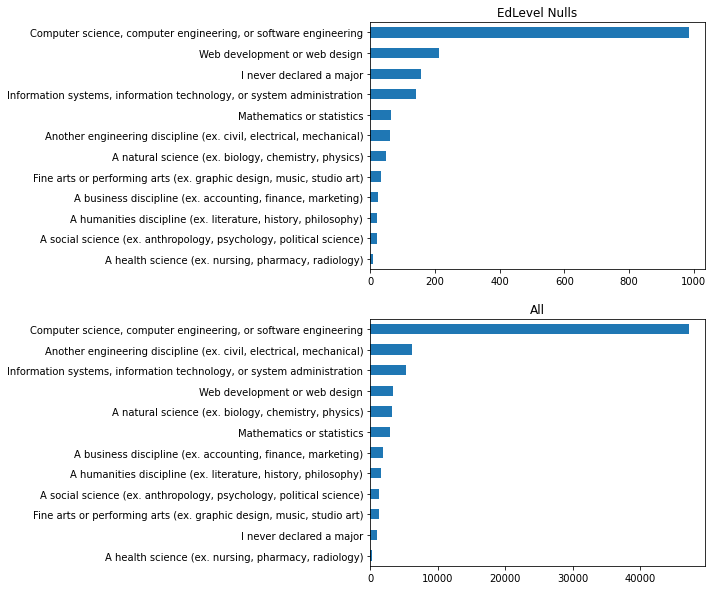

In [61]:
plt.figure(figsize=(6, 10))

plt.subplot(2, 1, 1)
tmp = df_2019[['EdLevel', 'UndergradMajor']][not_null_majorundergrad]
is_na_edlevel = tmp.EdLevel.isna()
tmp[is_na_edlevel].UndergradMajor.value_counts()[::-1].plot(kind='barh',
                                                            title='EdLevel Nulls')

plt.subplot(2, 1, 2)
df_2019.UndergradMajor.value_counts()[::-1].plot(kind='barh',
                                                 title='All');

There is actually a difference, where respondents with CS background have more presence in this portion of the data, and they might undergraduates or graduates. But since their EdLevel are null, they'all be added to undergraduates which will boost the undergraduates numbers without much increase in the respondents with no CS background.

So I'll drop them to keep the balance of the original data.

### Data Cleaning

In [62]:
# narrow down employment
emp_statuses = ['Employed full-time',
                'Employed part-time']

# drop null values in UndergradMajor and EdLevel
emp_2019 = df_2019.query('Employment in @emp_statuses')
emp_2019 = emp_2019.dropna(subset=['UndergradMajor', 'EdLevel'])

In [63]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

is_cs = emp_2019['UndergradMajor'].isin(cs_majors)
not_cs = (~is_cs)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
is_cs_bs = (is_cs) & (~emp_2019['EdLevel'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                             "Other doctoral degree (Ph.D, Ed.D., etc.)"]))
is_cs_pg = (is_cs) & (emp_2019['EdLevel'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"]))

emp_non_cs_2019 = emp_2019[not_cs]
emp_cs_2019 = emp_2019[is_cs]
emp_cs_bs_2019 = emp_2019[is_cs_bs]
emp_cs_pg_2019 = emp_2019[is_cs_pg]

cs_count = is_cs.sum()
non_cs_count = not_cs.sum()

cs_bs_count = is_cs_bs.sum()
cs_pg_count = is_cs_pg.sum()

assert (is_cs.sum() + not_cs.sum())  == emp_2019.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2019.shape[0]


In [64]:
dg_2019 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2019

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,15632,45675,33233,12442


## 2020

### Data Understanding

In [65]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [66]:
df_2020.describe(include=['O'])

,MainBranch,Hobbyist,Age1stCode,CompFreq,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,YearsCode,YearsCodePro
count,64162,64416,57900,40069,64072,45472,45472,44070,49537,49370,57431,63854,45948,50557,49349,45194,51727,54113,57378,42379,40314,47287,52883,42686,41732,48465,42286,41022,56156,50804,42623,57205,43231,37321,54803,58275,54983,56228,44334,50605,53843,39364,43992,56805,56476,46792,56970,51802,51701,49345,50995,40024,42279,52683,57684,46349
unique,5,2,63,3,183,142,141,3193,2808,8269,9,7,208,7,230,5,3,16243,14256,5216,2730,1277,1153,3,5,5,2172,63,4,3,3,2,5,63,4,61,444,4,9,7471,6287,3,14,3,6,6,6,3,3,2,12,3986,3789,6,52,52
top,I am a developer by profession,Yes,15,Yearly,United States,United States dollar,USD,PostgreSQL,MySQL,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Very satisfied,"I’m not actively looking, but I am open to new...",Python,HTML/CSS;JavaScript;PHP;SQL,Node.js,Node.js,Github,Github,Yes,Extremely important,Fairly important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Every few months,Not sure,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,20 to 99 employees,Linux,Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,jQuery,Just as welcome now as I felt last year,10,3
freq,47193,50388,5618,19818,12469,11050,11050,2310,3827,4424,26542,45270,29318,46013,2777,14611,29776,1152,1073,4134,7151,4732,4343,18712,20093,12674,1127,2456,20938,20213,20729,33367,11547,7349,28262,22415,2904,27170,9597,2011,4770,16987,40118,47275,15273,20432,17372,34626,38769,48871,31582,2480,2079,37201,4510,4815


In [67]:
df_2020.shape

(64461, 61)

It looks like the 2020 survey had lost alot of respondents, and also the number of features have been cut in half.

The features of importance to the analysis are the same as the previous year.

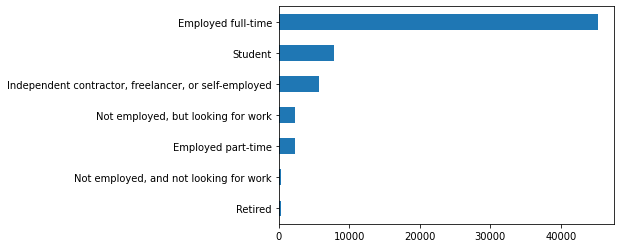

In [68]:
df_2020.Employment.value_counts()[::-1].plot(kind='barh');

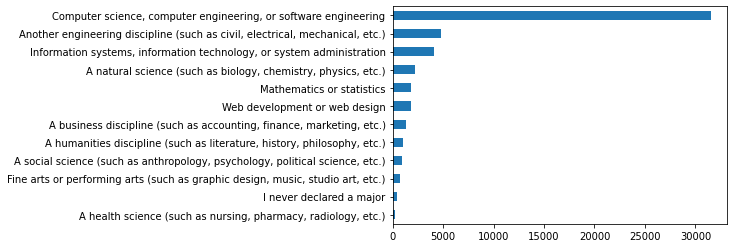

In [69]:
df_2020.UndergradMajor.value_counts()[::-1].plot(kind='barh');

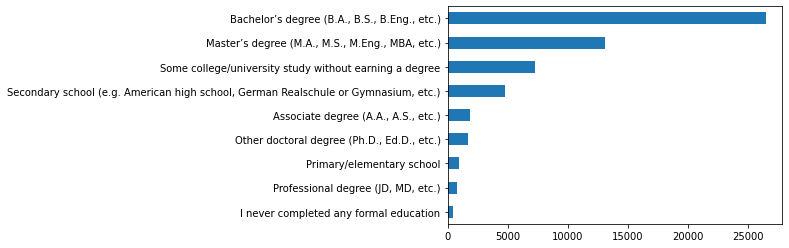

In [70]:
df_2020.EdLevel.value_counts()[::-1].plot(kind='barh');

In [71]:
# check for null values in EdLevel after dropping those of UndergradMajor
not_null_majorundergrad = df_2020.UndergradMajor.notnull()
df_2020.EdLevel[not_null_majorundergrad].isna().sum()

1236

The EdLevel feature has null value even after dropping the UndergradMajor nulls, so we'll have to drop them also.

### Data Cleaning

In [72]:
# narrow down respondents to full and part time employees
emp_statuses = ['Employed full-time',
                'Employed part-time']

emp_2020 = df_2020.query('Employment in @emp_statuses')
emp_2020 = emp_2020.dropna(subset=['UndergradMajor', 'EdLevel'])

In [73]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

is_cs = emp_2020['UndergradMajor'].isin(cs_majors)
not_cs = (~is_cs)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
is_cs_bs = (is_cs) & (~emp_2020['EdLevel'].isin(["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                                                     "Other doctoral degree (Ph.D., Ed.D., etc.)"]))
is_cs_pg = (is_cs) & (emp_2020['EdLevel'].isin(["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                                                    "Other doctoral degree (Ph.D., Ed.D., etc.)"]))

emp_non_cs_2020 = emp_2020[not_cs]
emp_cs_2020 = emp_2020[is_cs]
emp_cs_bs_2020 = emp_2020[is_cs_bs]
emp_cs_pg_2020 = emp_2020[is_cs_pg]


cs_count = is_cs.sum()
non_cs_count = not_cs.sum()

cs_bs_count = is_cs_bs.sum()
cs_pg_count = is_cs_pg.sum()

assert (is_cs.sum() + not_cs.sum())  == emp_2020.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2020.shape[0]


In [74]:
dg_2020 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2020

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,10387,29180,21044,8136


### Data Preparation

Now this is the last step in data prepartion for this question, where we'll concatenate the data prepared from each year's survey between 2015 and 2020.

In [75]:
dg = pd.concat([dg_2015, dg_2016, dg_2017, dg_2018, dg_2019, dg_2020])
dg.index = [2015, 2016, 2017, 2018, 2019, 2020]
dg = dg.rename(columns={'non_cs_count': 'No CS background',
                   'cs_count': 'CS background',
                   'cs_bs_count': 'CS undergraduates',
                   'cs_pg_count': 'CS postgradutes'})

In [76]:
dg

,No CS background,CS background,CS undergraduates,CS postgradutes
2015,6297,8680,5285,3395
2016,13156,18981,11945,7036
2017,8889,26621,19409,7212
2018,16010,49823,36446,13377
2019,15632,45675,33233,12442
2020,10387,29180,21044,8136


### Data Modelling

First let's look into the market composition in these 6 years.

In [77]:
def plt_donut(data, colors_dict, labels=True, fontsize=7, linewidth=2):
    """Function to plot donut chart."""
    data = data[data > 0]
    colors = [colors_dict[col] for col in data.index]
    if labels:
        labels = ['{:.2f}%'.format(x*100) for x in (data/data.sum()).values if x > 0]
        patches, text = plt.pie(data, labels=labels, colors=colors,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        textprops = {'fontsize': fontsize,})
    else:
        patches, text = plt.pie(data, colors=colors,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        textprops = {'fontsize': fontsize,})
    my_circle=plt.Circle( (0,0), 0.7, color='white',)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    return patches

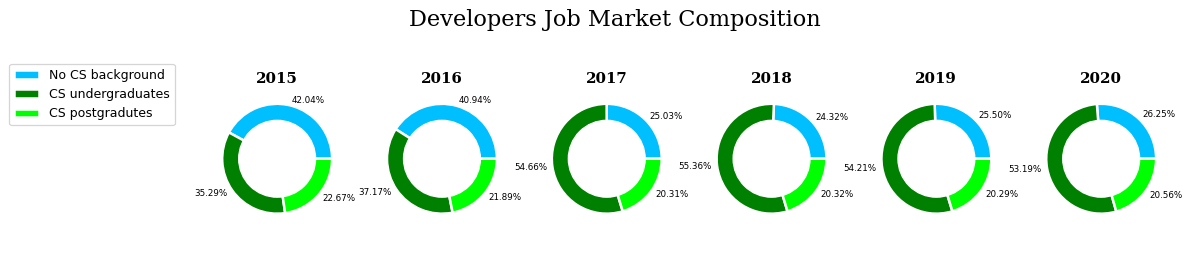

In [78]:
fig = plt.figure(figsize=(13, 3), dpi=90)
colors_dict = {col: color for col, color in zip(dg.columns[[0, 2, 3]], ['deepskyblue', 'green', 'lime'])}
fig.suptitle('Developers Job Market Composition', fontfamily='serif', fontsize=18)
for i, year in enumerate(dg.index):
    plt.subplot(1, 7, i+2)
    plt.title(year, fontfamily='serif', fontweight='bold')
    patches = plt_donut(dg.T[year][[0, 2, 3]], colors_dict);
plt.subplot(1, 7, 1)
plt.axis('off')
fig.tight_layout()
fig.subplots_adjust(wspace=0.2, top=0.8)
plt.legend(patches, dg.columns[[0, 2, 3]], loc='best');
plt.savefig('imgs/market_composition_donut.png', bbox_inches = "tight")



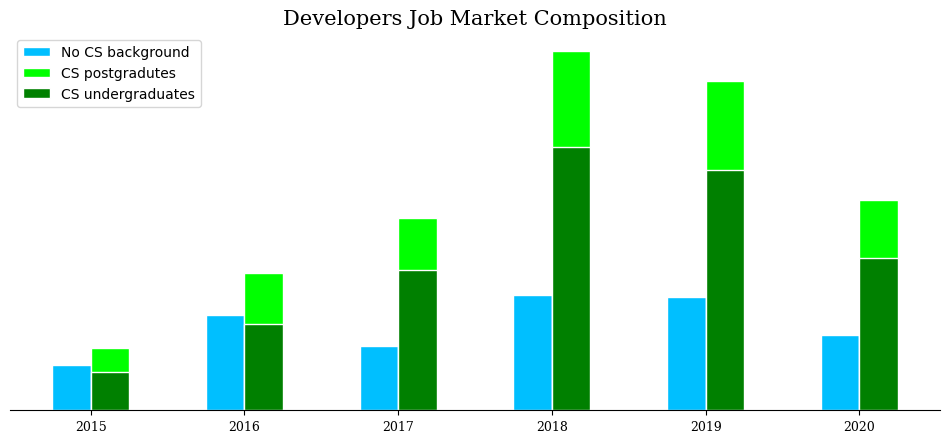

In [79]:
# dg.iloc[:, :4].plot(kind='bar', width=0.7, title='Background Composition of Employed Developers (over the years)');
fig, ax = plt.subplots(1, 1, figsize=(12, 5), dpi=100)
barWidth = 0.5
x1 = np.arange(0, len(dg.index)*2, 2)
x2 = [x + barWidth for x in x1]
labels = dg.columns[[0, 3, 2]]
plt.bar(x1,  dg.iloc[:, 0], width=barWidth, color=colors_dict[dg.columns[0]], edgecolor='white')
plt.bar(x2, dg.iloc[:, 2] + dg.iloc[:, 3], width=barWidth, color=colors_dict[dg.columns[3]], edgecolor='white')
plt.bar(x2, dg.iloc[:, 2], width=barWidth, color=colors_dict[dg.columns[2]], edgecolor='white')

offset = 0.25
plt.xticks([0+offset, 2+offset, 4+offset, 6+offset, 8+offset, 10+offset], dg.index, fontfamily='serif', fontsize=9)
plt.yticks([])

plt.legend(labels, loc='upper left')
plt.title('Developers Job Market Composition', fontfamily='serif', fontsize=15)

for spine in ['right', 'top', 'left']:
    ax.spines[spine].set_visible(False)

plt.savefig('imgs/market_composition_bar.png', bbox_inches = "tight")

First we have to notice that we are looking into the statistics of only **employed** users who answered the survey.

### 2015 and 2016

It seems that there was a constant rise of CS majors and non CS majors alike in the survey between 2015 and 2016. What is pretty interesting also in those two years is that the count of non CS majors exceeded that of CS undergraduates and postgraduates respectively.

### 2017

But then the count of non CS majors took a dip in 2017, and the CS majors count kept rising, where postgraduates counts slightly decreased, but there was a significant rise in CS undergraduates.

### 2018

Then in 2018 the amount of CS majors answering the survey peaked, and the non CS majors also, but they increased in proportion to CS majors.

### 2019

In 2019 the counts of both slightly decreased but their proportions remained pretty much the same.

### 2020

And in 2020 they both took a dip, and I think that may be because of covid.


When looking to the proportions side, we can see that after 2016 the arena of employed developers was stable in terms of its composition from CS and non CS majors. 

Where it was comprised of almost 40/60 (non-CS/CS) during 2015 and 2016, and after that it changed into 25/75. 

We can see that the job market is now split between non-CS majors, CS undergraduates and CS postgraduates with a proportion of 25/55/20. 

So to answer the question, it seems that the market has become more competitive due to the increase of CS undergraduates flooding the market starting from 2017, which slightly altered its composition and easily reduced the percentage of developers with no CS background.

But although the percentage of employed developers with no CS background has decreased, this doesn't mean that by default the chances of getting hired as a developer with no CS background has decreased, as this is also related to the job oppurtunities available.

So for example, if the number of CS undergraduates in increasing, and also the number of job oppurtunities are inreasing, then it's obvious that the CS undergraduates percentage in the market will increase, while the percentage of developer with non CS background will decrease, because the numbers of them entering the field each year is slowly increasing in comparison with CS undergraduates.

Therefore their percentage will keep decreasing while actually their chances of getting hired is the same or might even be higher.

So though developers with no formal CS background comprise almost a quarter of the market, chances of being a professional developer for them has considerably might have not changed, and might have even increased depending on the job oppurtunities.

But what we can see is that CS undergraduates are increasing with the markets demands.

## 2. What is the most common alternative education for data scientists over the years?

### Business Understanding

This question's relevance arises from the availability of a plethora of educational resources in this time for budding data scientists, and the presence of different approaches in using these resources.

So it would be nice if we have a way to tell which might be more important and effective than others.

### Data Understanding

To answer this question, we need to find features which indicate the respondents' role and then narrow down over data scientists and related roles.




### 2015

First we need to find which feature has the respondent's role.

In [80]:
q_2015.tolist()

['Country',
 'Age',
 'Gender',
 'Tabs or Spaces',
 'Years IT / Programming Experience',
 'Occupation',
 'Desktop Operating System',
 'Desktop Operating System: write-in',
 'Current Lang & Tech: Android',
 'Current Lang & Tech: Arduino',
 'Current Lang & Tech: AngularJS',
 'Current Lang & Tech: C',
 'Current Lang & Tech: C++',
 'Current Lang & Tech: C++11',
 'Current Lang & Tech: C#',
 'Current Lang & Tech: Cassandra',
 'Current Lang & Tech: CoffeeScript',
 'Current Lang & Tech: Cordova',
 'Current Lang & Tech: Clojure',
 'Current Lang & Tech: Cloud',
 'Current Lang & Tech: Dart',
 'Current Lang & Tech: F#',
 'Current Lang & Tech: Go',
 'Current Lang & Tech: Hadoop',
 'Current Lang & Tech: Haskell',
 'Current Lang & Tech: iOS',
 'Current Lang & Tech: Java',
 'Current Lang & Tech: JavaScript',
 'Current Lang & Tech: LAMP',
 'Current Lang & Tech: Matlab',
 'Current Lang & Tech: MongoDB',
 'Current Lang & Tech: Node.js',
 'Current Lang & Tech: Objective-C',
 'Current Lang & Tech: Perl',
 '

In 2015, the occupation feature has the repondents' role.

Let's look into the roles we want to narrow down.

In [81]:
df_2015.iloc[:, 5].value_counts()

Full-stack web developer                                 6765
Student                                                  2845
Back-end web developer                                   2104
Desktop developer                                        1735
Front-end web developer                                  1242
Mobile developer - Android                                847
Mobile developer - iOS                                    634
Embedded application developer                            609
Enterprise level services developer                       599
Developer with a statistics or mathematics background     464
Data scientist                                            409
Executive (VP of Eng., CTO, CIO, etc.)                    376
Mobile developer                                          376
System administrator                                      344
DevOps                                                    322
Business intelligence or data warehousing expert          179
Graphics

### Data Preparation

We'll filter the dataframe for roles related to datascience.

In [82]:
# Narrow down the roles related to data science into a new dataframe.
ds_2015 = df_2015[df_2015.iloc[:, 5].isin(['Data scientist', 'Machine learning developer',
                                           'Developer with a statistics or mathematics background '])]
ds_2015.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Select all that apply,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Select all that apply.5,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Select all that apply.6,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Select all that apply.7,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
2284,France,30-34,Male,Spaces,6 - 10 years,Data scientist,Ubuntu,NaN,NaN,NaN,NaN,C,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,R,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2285,Germany,25-29,Male,Tabs,6 - 10 years,Data scientist,Mac OS X,NaN,NaN,NaN,NaN,NaN,NaN,C++11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matlab,NaN,NaN,NaN,NaN,NaN,Python,R,NaN,NaN,NaN,...,To showcase my Stack Overflow activity,NaN,NaN,0,1-2 hours per week,Once a day,Emacs,NaN,Dark,Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Git,NaN,To get help for my job,To give help to others,NaN,NaN,NaN,NaN,NaN,Because I love to learn,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,NaN,I feel a sense of responsibility to the develo...,NaN,NaN,"I don't answer much (or at all), but I want to..."
2286,Germany,35-39,Male,Tabs,6 - 10 years,Data scientist,Windows 7,NaN,NaN,NaN,NaN,NaN,C++,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,NaN,NaN,...,NaN,NaN,NaN,4,5-10 hours per week,Multipleætimes a day,NotePad++,NaN,Dark,NaN,NaN,SVN,CVS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVN,NaN,To get help for my job,NaN,Because I can't do my job without it,NaN,NaN,NaN,NaN,Because I love to learn,NaN,Usually,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."
2287,India,25-29,Male,It depends,2 - 5 years,Data scientist,Windows 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cloud (AWS, GAE, Azure, etc.)",NaN,NaN,NaN,Hadoop,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,2-5 hours per week,Multipleætimes a day,NotePad++,NaN,Light,NaN,NaN,SVN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVN,NaN,NaN,To give help to others,NaN,NaN,To demonstrate that I'm good at what I do,NaN,NaN,Because I love to learn,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,NaN,NaN,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
2288,United States,30-34,Male,It depends,11+ years,Data scientist,Windows 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matlab,NaN,NaN,NaN,Perl,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5,None,I have never been on Stack Overflow. I just lo...,Vim,NaN,Dark,NaN,NaN,SVN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SVN,NaN,To get help for my job,NaN,NaN,NaN,NaN,NaN,NaN,Because I love to learn,I don't really use Stack Overflow. I just take...,Usually,NaN,NaN,NaN,NaN,NaN,NaN,"I don't answer much (or at all), and I don't w...",NaN


2016

### Data Understanding

We should find the feature that has the respondets' role.

In [83]:
q_2016.tolist()

['Unnamed: 0',
 'collector',
 'country',
 'un_subregion',
 'so_region',
 'age_range',
 'age_midpoint',
 'gender',
 'self_identification',
 'occupation',
 'occupation_group',
 'experience_range',
 'experience_midpoint',
 'salary_range',
 'salary_midpoint',
 'big_mac_index',
 'tech_do',
 'tech_want',
 'aliens',
 'programming_ability',
 'employment_status',
 'industry',
 'company_size_range',
 'team_size_range',
 'women_on_team',
 'remote',
 'job_satisfaction',
 'job_discovery',
 'dev_environment',
 'commit_frequency',
 'hobby',
 'dogs_vs_cats',
 'desktop_os',
 'unit_testing',
 'rep_range',
 'visit_frequency',
 'why_learn_new_tech',
 'education',
 'open_to_new_job',
 'new_job_value',
 'job_search_annoyance',
 'interview_likelihood',
 'how_to_improve_interview_process',
 'star_wars_vs_star_trek',
 'agree_tech',
 'agree_notice',
 'agree_problemsolving',
 'agree_diversity',
 'agree_adblocker',
 'agree_alcohol',
 'agree_loveboss',
 'agree_nightcode',
 'agree_legacy',
 'agree_mars',
 'importan

There are two features which are occupation and occupation_group.

Let's take a look into both to figure out which on is the one to use.

In [84]:
df_2016.occupation.value_counts()

Full-stack web developer                                 13886
Back-end web developer                                    6061
Student                                                   5619
Desktop developer                                         3390
Front-end web developer                                   2873
other                                                     2585
Enterprise level services developer                       1471
Mobile developer - Android                                1462
Mobile developer                                          1373
Embedded application developer                            1268
Mobile developer - iOS                                    1245
DevOps                                                    1074
Developer with a statistics or mathematics background      960
Executive (VP of Eng., CTO, CIO, etc.)                     888
Data scientist                                             800
System administrator                                   

In [85]:
df_2016.occupation_group.value_counts()

Full-stack web developer                                                                                13886
Back-end web developer                                                                                   6061
Student                                                                                                  5619
Mobile Dev (Android, iOS, WP & Multi-Platform)                                                           4139
Desktop developer                                                                                        3390
Front-end web developer                                                                                  2873
Mathematics Developers (Data Scientists, Machine Learning Devs & Devs with Stats & Math Backgrounds)     2145
Enterprise level services developer                                                                      1471
Embedded application developer                                                                           1268
DevOps    

It seems that occupation_group has a category for datascience related roles, so we'll use that instead of occupation.

### Data Preparation

We'll have to drop null values from the occupation_group column to filter for the value we want in occupation_group.

In [86]:
tmp = df_2016.dropna(subset=['occupation_group'])
ds_2016 = tmp[tmp.occupation_group.str.contains('Mathematics Developers')]
ds_2016.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
28,34171,Facebook,Andorra,Southern Europe,Western Europe,20-24,22.0,Female,Hacker,Data scientist,"Mathematics Developers (Data Scientists, Machi...",1 - 2 years,1.5,"$30,000 - $40,000",35000.0,NaN,AngularJS; JavaScript; Spark,C++; iOS; Spark,Yes,7.0,Prefer not to disclose,Manufacturing,20-99 employees,10-14 people,1,Part-time remote,I'm somewhat dissatisfied with my job,LinkedIn,Xamarin,A few times a month,1-2 hours per week,Dogs,Windows 10,No,I'm not sure,Very rarely,I want to be a better developer,B.A. in Computer Science (or related field),"I'm not actively looking, but I am open to new...",Salary,Writing my CV and keeping it updated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,29315,Facebook,Argentina,South America,South America,20-24,22.0,Male,Developer; Engineer; Sr. Developer; Full-stack...,Data scientist,"Mathematics Developers (Data Scientists, Machi...",2 - 5 years,3.5,"$10,000 - $20,000",15000.0,NaN,JavaScript; Python; Redis; Ruby; SQL,MongoDB; Python; R; Ruby; SQL,Yes,7.0,Employed part-time,Other (please specify),5-9 employees,1-4 people,1,I rarely work remotely,I love my job,A friend referred me,Sublime,Multiple times a day,1-2 hours per week,Dogs,Mint,I don't know,101 - 500,Once a day,I learn new technology when my job requires it,I'm self-taught; On-the-job training; B.S. in ...,"I'm not actively looking, but I am open to new...",Work/life balance; Opportunity for advancement...,Writing my CV and keeping it updated,60%,Introduce me to the team; Show me the space in...,Star Wars,Agree somewhat,Agree somewhat,Agree completely,Agree somewhat,Agree completely,Disagree completely,Neutral,Neutral,Disagree somewhat,Disagree completely,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,I don't care about this,This is very important,This is somewhat important,This is somewhat important,I don't care about this,Fragile code base; Poor documentation; Changin...,To get help for my job; To give help to others
132,48946,Facebook,Argentina,South America,South America,50-59,54.5,Male,Programmer,Developer with a statistics or mathematics bac...,"Mathematics Developers (Data Scientists, Machi...",2 - 5 years,3.5,"$40,000 - $50,000",45000.0,NaN,Haskell; Python,Haskell; Python,No,9.0,Employed full-time,Education,100-499 employees,1-4 people,2,Part-time remote,I'm somewhat dissatisfied with my job,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,21769,Facebook,Armenia,Western Asia,Eastern Europe,25-29,27.0,Male,Engineer,Machine learning developer,"Mathematics Developers (Data Scientists, Machi...",Less than 1 year,0.5,NaN,NaN,NaN,Python,Python; R; Spark,No,2.0,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++; IPython / Jupyter,Once a day,None,NaN,Windows 8,I don't know,I don't have an account,Multi

## 2017

### Data Understanding

We'll look for the feature that has the respondents' roles in 2017 survey.

In [87]:
sorted(df_2017.columns.tolist())

['AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'CareerSatisfaction',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'Ex

The feature we want is DeveloperType, so let's look into how it is formatted.

In [88]:
df_2017.DeveloperType.value_counts()

Web developer                                                                                                                                                                                                              10683
Web developer; Desktop applications developer                                                                                                                                                                               1849
Mobile developer                                                                                                                                                                                                            1556
Web developer; Mobile developer                                                                                                                                                                                             1503
Desktop applications developer                                                                      

So this was a multiple choice question, and there are multiple roles within each answer. 

We can use the split_and_count function to get a better picture of the roles present in this feature.

In [89]:
split_and_count(df_2017.DeveloperType)

Web developer                                            26235
Desktop applications developer                           10435
Mobile developer                                          8326
Database administrator                                    5192
Developer with a statistics or mathematics background     4091
Systems administrator                                     4086
DevOps specialist                                         4015
Embedded applications/devices developer                   3352
Data scientist                                            3045
Other                                                     2694
Graphics programming                                      1731
Graphic designer                                          1426
Machine learning specialist                               1379
Quality assurance engineer                                1252
dtype: int64

We can filter for respondets that have selected an answer with on the data science related roles, but we might have a problem. 

If a respondent has selected one of the data science related roles among other roles not related to data science, the information we are looking (which is educational resources) will be influenced by the other roles that this respondent answered with.

So let's first filter for the data science related roles, and look at the other roles that are were selected by these respondents.

In [90]:
tmp = df_2017[df_2017.DeveloperType.str.contains('Data scientist') | df_2017.DeveloperType.str.contains('Machine learning specialist') |\
            df_2017.DeveloperType.str.contains('Developer with a statistics or mathematics background')]
split_and_count(tmp.DeveloperType)

Developer with a statistics or mathematics background    4091
Web developer                                            3839
Data scientist                                           3045
Desktop applications developer                           2193
Database administrator                                   1558
Mobile developer                                         1443
Machine learning specialist                              1379
Systems administrator                                    1067
DevOps specialist                                         975
Embedded applications/devices developer                   884
Graphics programming                                      571
Other                                                     430
Quality assurance engineer                                413
Graphic designer                                          365
dtype: int64

We can see alot of roles that aren't related to datascience present in the filtered data, which will affect the analysis we are trying to do.

So we have to find another way to filter only the respondents who strictly have data science related roles.

First we'll make a function that check for rows that contains datascience roles, and check for rows contains other roles. Then we'll filter for the rows that has datascience roles and doesn't have other roles.

We could drop null values in DevelopeType, but we don't need to, as they will be automatically excluded with other roles.

In [91]:
def check_values(series, values_list):
    """Function that returns a boolean series specifying whether each row
    has any of the values_list provided to the function"""
    has_value = series.str.contains(values_list[0])
    for value in values_list[1:]:
        has_value = has_value | series.str.contains(value)
    return has_value


def filter_df(df, column, values_list, extra_values_list=None):
    """Function that filter a dataframe using a list of values by checking whether
    a column contains only values from the provided values_list."""
    other_values_list = list(set(split_and_count(df[column]).index).difference(values_list))
    if extra_values_list:
        other_values_list = list(set(other_values_list).difference(extra_values_list))
    is_value = check_values(df[column], values_list)
    is_other = check_values(df[column], other_values_list)
    return df[is_value & ~is_other]

ds_roles = ['Data scientist', 'Machine learning specialist',
            'Developer with a statistics or mathematics background']

ds_2017 = filter_df(df_2017, 'DeveloperType', ds_roles)

# check the DeveloperType values present now
split_and_count(ds_2017.DeveloperType)

Developer with a statistics or mathematics background    683
Data scientist                                           495
Machine learning specialist                              237
dtype: int64

Now we have significantly decreased the number of respondents that we can use for analysis, but at least this way it will be cleaner and the information will be more related to data science.

## 2018

### Data Understanding

We need to find the column that contains the role of the respondents, and then check if we'll clean it the same way as 2017.

In [92]:
sorted(df_2018.columns.tolist())

['AIDangerous',
 'AIFuture',
 'AIInteresting',
 'AIResponsible',
 'AdBlocker',
 'AdBlockerDisable',
 'AdBlockerReasons',
 'AdsActions',
 'AdsAgreeDisagree1',
 'AdsAgreeDisagree2',
 'AdsAgreeDisagree3',
 'AdsPriorities1',
 'AdsPriorities2',
 'AdsPriorities3',
 'AdsPriorities4',
 'AdsPriorities5',
 'AdsPriorities6',
 'AdsPriorities7',
 'Age',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'AssessBenefits1',
 'AssessBenefits10',
 'AssessBenefits11',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessJob1',
 'AssessJob10',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'CareerSatisfaction',
 'CheckInCode',
 'CommunicationTools',
 'CompanySize',
 'ConvertedSalary',
 'Country',
 'Currency',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Dependents',
 'DevType',
 'Educat

The column that we are looking for is DevType. Let's a look at it.

In [93]:
df_2018.DevType.value_counts()

Back-end developer                                                                                                                                                                                                 6417
Full-stack developer                                                                                                                                                                                               6104
Back-end developer;Front-end developer;Full-stack developer                                                                                                                                                        4460
Mobile developer                                                                                                                                                                                                   3518
Student                                                                                                                                 

So now we know that it shall be cleaned the same way as 2017.

Let's first check the data science related roles.


In [94]:
split_and_count(df_2018.DevType)

Back-end developer                               53300
Full-stack developer                             44353
Front-end developer                              34822
Mobile developer                                 18804
Desktop or enterprise applications developer     15807
Student                                          15732
Database administrator                           13216
Designer                                         12019
System administrator                             10375
DevOps specialist                                 9549
Data or business analyst                          7559
Data scientist or machine learning specialist     7088
QA or test developer                              6194
Engineering manager                               5256
Embedded applications or devices developer        4819
Game or graphics developer                        4642
Product manager                                   4316
Educator or academic researcher                   3641
C-suite ex

### Data Preparation

Now that we now that data science related rows in this dataset, we can filter them out to use them in our analysis.

Since the developer types include some roles that don't necessairly conflict with being a data scientists such as students, educators or academic researches, they will be included in the data science related roles in order to include respondents who are both data scientists and one of these roles.

In [95]:
ds_roles = ['Data or business analyst', 'Data scientist or machine learning specialist']
extra_roles = ['Student', 'Educator or academic researcher']

role_column = 'DevType'
ds_2018 = filter_df(df_2018, role_column, ds_roles, extra_roles)

# check the DeveloperType values present now
split_and_count(ds_2018[role_column])

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Data scientist or machine learning specialist    1884
Data or business analyst                         1200
Student                                           437
Educator or academic researcher                   319
C-suite executive (CEO, CTO, etc.)                 27
dtype: int64

In [96]:
ds_2018.DevType.value_counts()

Data scientist or machine learning specialist                                                                        869
Data or business analyst                                                                                             499
Data or business analyst;Data scientist or machine learning specialist                                               448
Data scientist or machine learning specialist;Student                                                                160
Data scientist or machine learning specialist;Educator or academic researcher                                        117
Data scientist or machine learning specialist;Educator or academic researcher;Student                                100
Data or business analyst;Data scientist or machine learning specialist;Student                                        92
Data or business analyst;Data scientist or machine learning specialist;Educator or academic researcher                53
Data or business analyst;Student

The C-suite executive role present is an unexpected behavior of the function, but it doesn't matter as long the majority of respondents in the filtered dataframe are data scientists and anlaysts.

And now we are sure that the filtered dataframe only contains data scientists and analysts, besides having an other non-developer role such as being a student, educator or researcher.

## 2019

### Data Understanding

The first step as always is to figure out the column that we need and take a look at it's values.

In [97]:
sorted(df_2019.columns.tolist())

['Age',
 'Age1stCode',
 'BetterLife',
 'BlockchainIs',
 'BlockchainOrg',
 'CareerSat',
 'CodeRev',
 'CodeRevHrs',
 'CompFreq',
 'CompTotal',
 'Containers',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'Dependents',
 'DevEnviron',
 'DevType',
 'EdLevel',
 'EduOther',
 'Employment',
 'EntTeams',
 'Ethnicity',
 'Extraversion',
 'FizzBuzz',
 'Gender',
 'Hobbyist',
 'ITperson',
 'ImpSyn',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'LastHireDate',
 'LastInt',
 'MainBranch',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'OffOn',
 'OpSys',
 'OpenSource',
 'OpenSourcer',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseHow',
 'PurchaseWhat',
 'Respondent',
 'ResumeUpdate',
 'SOAccount',
 'SOComm',
 'SOFindAnswer',
 'SOHowMuchTime',
 'SOJobs',
 'SONewContent',
 'SOPartFreq',
 'SOTimeSaved',
 'SOVisit1st',
 'SOVisit

The role column is DevType, which is just the same as the 2018 survey.

Let's look if the values in it are the same or not.

In [98]:
split_and_count(df_2019.DevType)

Developer, full-stack                            42222
Developer, back-end                              40665
Developer, front-end                             26649
Developer, desktop or enterprise applications    17316
Developer, mobile                                14698
Student                                          11921
Database administrator                            9520
Designer                                          9182
System administrator                              8929
DevOps specialist                                 8862
Developer, embedded applications or devices       7248
Data scientist or machine learning specialist     6460
Developer, QA or test                             6359
Data or business analyst                          6294
Academic researcher                               5930
Engineer, data                                    5819
Educator                                          4492
Developer, game or graphics                       4439
Engineerin

There is an additional role, which is data engineer.

We shall also include other extra non-developer roles besides data science roles.

### Data Preparation

In [99]:
ds_roles = ['Data or business analyst', 'Data scientist or machine learning specialist',
            'Engineer, data']
extra_roles = ['Student', 'Academic researcher', 'Educator', 'Scientist']

role_column = 'DevType'
ds_2019 = filter_df(df_2019, role_column, ds_roles, extra_roles)

# check the DeveloperType values present now
split_and_count(ds_2019[role_column])

Data scientist or machine learning specialist    1739
Data or business analyst                         1127
Engineer, data                                    758
Academic researcher                               648
Scientist                                         510
Student                                           493
Educator                                          167
dtype: int64

## 2020

### Data Understanding

Now for the final year, we shall do exactly what we did with the all of the previous surveys.

In [100]:
sorted(df_2020.columns.tolist())

['Age',
 'Age1stCode',
 'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'Country',
 'CurrencyDesc',
 'CurrencySymbol',
 'DatabaseDesireNextYear',
 'DatabaseWorkedWith',
 'DevType',
 'EdLevel',
 'Employment',
 'Ethnicity',
 'Gender',
 'Hobbyist',
 'JobFactors',
 'JobSat',
 'JobSeek',
 'LanguageDesireNextYear',
 'LanguageWorkedWith',
 'MainBranch',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWCollabToolsDesireNextYear',
 'NEWCollabToolsWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWEdImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWLearn',
 'NEWOffTopic',
 'NEWOnboardGood',
 'NEWOtherComms',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'NEWPurpleLink',
 'NEWSOSites',
 'NEWStuck',
 'OpSys',
 'OrgSize',
 'PlatformDesireNextYear',
 'PlatformWorkedWith',
 'PurchaseWhat',
 'Respondent',
 'SOAccount',
 'SOComm',
 'SOPartFreq',
 'SOVisitFreq',
 'Sexuality',
 'SurveyEase',
 'SurveyLength',
 'Trans',
 'UndergradMajor',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WelcomeChange',
 'W

In [101]:
split_and_count(df_2020.DevType)

Developer, back-end                              27228
Developer, full-stack                            27125
Developer, front-end                             18296
Developer, desktop or enterprise applications    11784
Developer, mobile                                 9482
DevOps specialist                                 5969
Database administrator                            5722
Designer                                          5321
System administrator                              5242
Developer, embedded applications or devices       4750
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Developer, QA or test                             3947
Engineer, data                                    3738
Academic researcher                               3552
Educator                                          2928
Developer, game or graphics                       2789
Engineering manager                               2724
Product ma

In [102]:
ds_roles = ['Data or business analyst', 'Data scientist or machine learning specialist',
            'Engineer, data']
extra_roles = ['Student', 'Academic researcher', 'Educator', 'Scientist']

role_column = 'DevType'
ds_2020 = filter_df(df_2020, role_column, ds_roles, extra_roles)

# check the DeveloperType values present now
split_and_count(ds_2020[role_column])

Data scientist or machine learning specialist    1136
Data or business analyst                          737
Engineer, data                                    494
Academic researcher                               403
Scientist                                         303
Educator                                          102
dtype: int64

### Data Preparation

Now we need to extract the education information from each dataframe and merge them to visualize the results.

The steps that we are going to do with each survey is:
1. Select the columns have information about alternative educational resources for each survey
2. Aggregate the educational sources per survey and rename them
2. Visualize the results

In [103]:
# 2015
edu_sources = list(map(lambda x: x.lstrip('Training & Education: '), q_2015[94:100].tolist()))
values = ds_2015.iloc[:, 94:100].notnull().sum().values.tolist()
ds_edu_2015 = pd.DataFrame({edu: value for edu, value in zip(edu_sources, values)}, index=[2015])

ds_edu_2015 = ds_edu_2015.rename(columns={
    'No formal training': 'Self-taught',
    'On the job': 'On-the-job training',
    'Boot camp or night school': 'Bootcamp',
    'Online Class': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Industry certification': 'Industry certification program'
})

ds_edu_2015

,Self-taught,On-the-job training,Bootcamp,MOOCs,Mentorship program,Industry certification program
2015,208,187,11,127,5,17


In [104]:
# 2016
ds_edu_2016 = chain.from_iterable(ds_2016['education'].str.split(';').dropna().tolist())
ds_edu_2016 = map(lambda x: x.strip(), ds_edu_2016)
ds_edu_2016 = pd.DataFrame(Counter(ds_edu_2016), index=[2016])

ds_edu_2016 = ds_edu_2016.rename(columns={
    'I\'m self-taught': 'Self-taught',
    'Full-time, intensive program (e.g. "boot-camp")': 'Bootcamp',
    'Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)': 'MOOCs',
    'Mentorship program (e.g. Flatiron School, GDI, etc.)': 'Mentorship program',
    'Part-time program (e.g. night school)': 'Part-time program'
})
ds_edu_2016

,B.A. in Computer Science (or related field),Self-taught,On-the-job training,B.S. in Computer Science (or related field),PhD in Computer Science (or related field),Some college coursework in Computer Science (or related field),Masters Degree in Computer Science (or related field),MOOCs,Bootcamp,Part-time program,Industry certification program,Mentorship program
2016,115,1356,798,571,240,499,607,597,117,68,95,25


In [105]:
# 2017
ds_edu_2017 = ds_2017['EducationTypes']
ds_edu_2017 = chain.from_iterable(ds_edu_2017.str.split(';').dropna().tolist())
ds_edu_2017 = map(lambda x: x.strip(), ds_edu_2017)
ds_edu_2017 = pd.DataFrame(Counter(ds_edu_2017), index=[2017])

ds_edu_2017
ds_edu_2017 = ds_edu_2017.rename(columns={
    'Online course': 'MOOCs',
    'Part-time/evening course': 'Part-time program',
    'Industry certification': 'Industry certification program'
})
ds_edu_2017

,Self-taught,Hackathon,On-the-job training,Coding competition,Open source contributions,MOOCs,Part-time program,Industry certification program,Bootcamp
2017,542,149,246,196,219,306,91,66,43


In [106]:
# 2018
ds_edu_2018 = ds_2018['EducationTypes']
ds_edu_2018 = chain.from_iterable(ds_edu_2018.str.split(';').dropna().tolist())
ds_edu_2018 = map(lambda x: x.strip(), ds_edu_2018)
ds_edu_2018 = pd.DataFrame(Counter(ds_edu_2018), index=[2018])


ds_edu_2018 = ds_edu_2018.rename(columns={
    'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
    'Received on-the-job training in software development': 'On-the-job training',
    'Participated in a full-time developer training program or bootcamp': 'Bootcamp',
    'Taken an online course in programming or software development (e.g. a MOOC)': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
    'Taken a part-time in-person course in programming or software development': 'Part-time program',
    'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
    'Participated in a hackathon': 'Hackathon',
    'Contributed to open source software': 'Open source contributions'
})
ds_edu_2018

,On-the-job training,Industry certification program,Self-taught,MOOCs,Hackathon,Open source contributions,Bootcamp,Part-time program,Coding competition
2018,519,134,1526,1169,460,617,126,293,424


In [107]:
# 2019
ds_edu_2019 = ds_2019['EduOther']
ds_edu_2019 = chain.from_iterable(ds_edu_2019.str.split(';').dropna().tolist())
ds_edu_2019 = map(lambda x: x.strip(), ds_edu_2019)
ds_edu_2019 = pd.DataFrame(Counter(ds_edu_2019), index=[2019])

ds_edu_2019 = ds_edu_2019.rename(columns={
    'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
    'Received on-the-job training in software development': 'On-the-job training',
    'Participated in a full-time developer training program or bootcamp': 'Bootcamp',
    'Taken an online course in programming or software development (e.g. a MOOC)': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
    'Taken a part-time in-person course in programming or software development': 'Part-time program',
    'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
    'Participated in a hackathon': 'Hackathon',
    'Contributed to open source software': 'Open source contributions'
})
ds_edu_2019

,MOOCs,Self-taught,Open source contributions,Part-time program,On-the-job training,Coding competition,Hackathon,Industry certification program,Bootcamp
2019,1930,2174,856,439,851,651,726,256,267


In [108]:
# concatenate each survey's aggregation dataframe
ds_edu = pd.concat([ds_edu_2015,
           ds_edu_2016,
           ds_edu_2017,
           ds_edu_2018,
           ds_edu_2019]).fillna(0)

ds_edu


,Self-taught,On-the-job training,Bootcamp,MOOCs,Mentorship program,Industry certification program,B.A. in Computer Science (or related field),B.S. in Computer Science (or related field),PhD in Computer Science (or related field),Some college coursework in Computer Science (or related field),Masters Degree in Computer Science (or related field),Part-time program,Hackathon,Coding competition,Open source contributions
2015,208,187,11,127,5.0,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,1356,798,117,597,25.0,95,115.0,571.0,240.0,499.0,607.0,68.0,0.0,0.0,0.0
2017,542,246,43,306,0.0,66,0.0,0.0,0.0,0.0,0.0,91.0,149.0,196.0,219.0
2018,1526,519,126,1169,0.0,134,0.0,0.0,0.0,0.0,0.0,293.0,460.0,424.0,617.0
2019,2174,851,267,1930,0.0,256,0.0,0.0,0.0,0.0,0.0,439.0,726.0,651.0,856.0


We can see that there are 5 columns which encode formal methods of education included in the 2016 row only.

We'll drop these columns since they won't contribute the question we are asking.

In [109]:
ds_edu = ds_edu.drop(ds_edu.columns[[6, 7, 8, 9, 10]], axis=1)

In [110]:
# Select a color for each of the remaining columns for visualization
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
cols = ds_edu.sum().sort_values(ascending=False)[:-1].index
cols_colors_dict = {col: color for col, color in zip(cols, colors)}

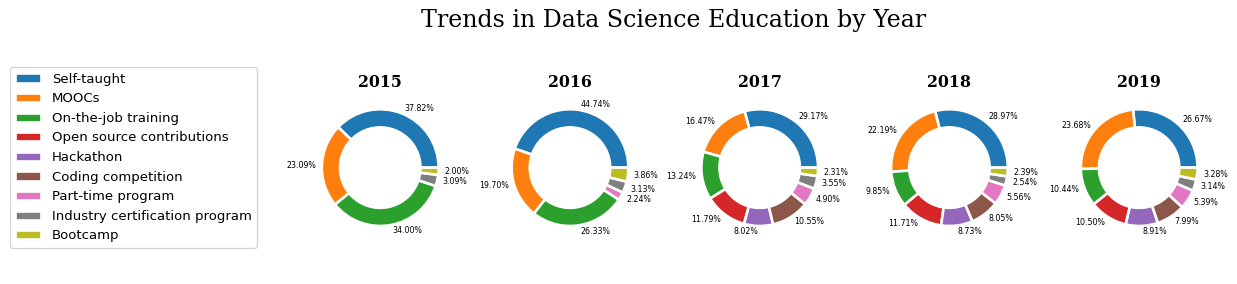

In [111]:
fig = plt.figure(figsize=(12, 3), dpi=95)
fig.suptitle('Trends in Data Science Education by Year', fontfamily='serif', fontsize=18)

wedgeprops={'linewidth': 1, 'edgecolor': 'white' }
textprops = {}

for i, year in enumerate(ds_edu.index):
    plt.subplot(1, len(ds_edu.index)+1,i+2)
    plt.title(year, fontfamily='serif', fontweight='bold')
    patches = plt_donut(ds_edu.loc[year, cols], cols_colors_dict, labels=True, fontsize=6);
plt.subplot(1, len(ds_edu.index)+1, 1)
plt.axis('off')

# set the spacing between subplots
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.8)
plt.legend(patches, cols, loc='best');

plt.savefig('imgs/ds_education_donut.png', bbox_inches='tight')

In [112]:
len(cols)

9

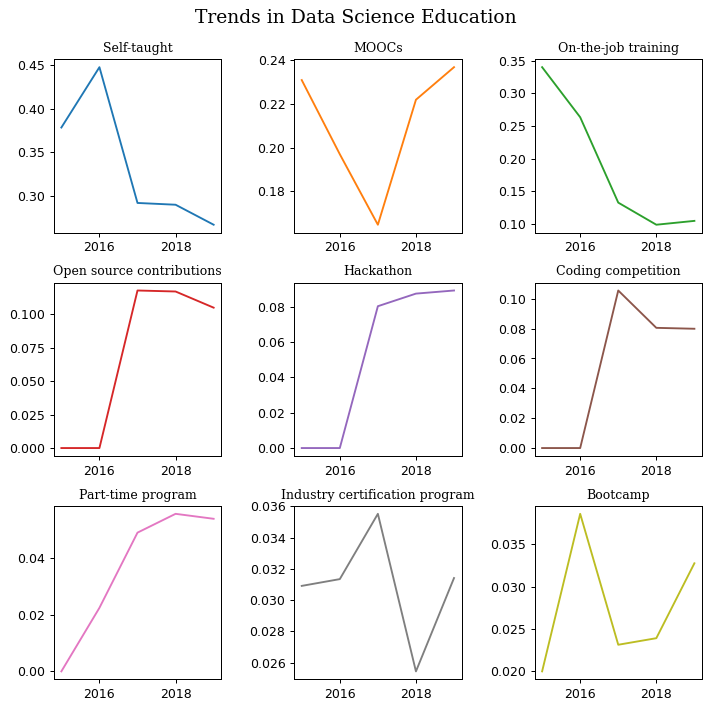

In [113]:
fig = plt.figure(figsize=(8, 8), dpi=90)
fig.suptitle('Trends in Data Science Education', fontfamily='serif',
              fontsize=15)

ds_edu_prop = ds_edu[cols].T/ds_edu[cols].sum(axis=1)

for i, col in enumerate(cols):
    plt.subplot(3, 3, i+1)
    ds_edu_prop.T[col].plot(kind='line', color=cols_colors_dict[col]);
    plt.title(col, fontsize=10, fontfamily='serif', fontweight='light')

    # ax.spines['top'].set_visible(False)   
    # ax.spines['right'].set_visible(False)      
fig.tight_layout()
fig.subplots_adjust(top=0.91)
plt.savefig('imgs/ds_education_bar.png', bbox_inches='tight')


### Self-education

We can see the previous trends in alternative education dissolve into stable composition through 2017, 2018 and 2019.

Where earlier in 2015 and 2016 the self-taught data scientist was the prevelant one. Maybe that was due to the absence of other means of education, and that's why it's proportion kept decreasing every year with increasing educational sources.

### MOOCs

MOOCs popularity fell down during 2016 and 2017, then it started gaining increasing again through 2018 and 2019. 

### On the job training

It siginificantly fell starting from 2017, and then stablizied. This might indicate a change in how data scientists were hired back then, as the data science sphere had data scientists who didn't need much on the job training to learn how to do their jobs.


### Open source contributions

The stability over the years signify that this method is only relevant to a certain percentage of data scientists who aren't increasing or decreasing in the field, and maybe these are data scientsts who are more heavy on the software engineering side.

### Hackathons and competitions

I originally thought that they would have increasing popularity over the years, but it seems that they are just as stable as open source contributions. 

### Part-time programs, Bootcamps and Industry Certifications

Part-time programs has gained popularity over the years, and that's probably because they became more available, and more reliable. Also bootcamps and industry certifications popularity between respondents has zigzaged throughout the years.

<!-- ### 2015 and 2016

We can see how important being able to educate yourself in 2015 and 2016, where 36.79% of respondents stated that they are self-taught (through books, documentation, online communities, etc..). 22.4%

The majority of data scientists got their education through job training and MOOCs in 2015 and 2016, where only a small percentage pursued industry certifications, bootcamps or night schools.

We have to notice that in the 2015 and 2016 survey these were the only options, where hacakthons, competitions and open source contributions weren't available as answers.

### 2017, 2018 and 2019
We can see that hackathons and competitions became a big part of self education for data scientists since their introduction, along with open source contributions.

It's obvious also that the percentages of each category is pretty much stable over these years, which gives us a good idea about how a data scientist should learn.

So the verdict here is that 25% of data scientists take online courses, 15% of them have learned through on-the-job training, then 16% listed open source contributions, 22% listed hackathons and competitions. then almost 22% listed either industry certifiactions, part-time programs or bootcamps.

The most prevelant option is MOOCs, where 25% of data scientist use them as education. Then if we take on-the-job training, open source contributions, hackathons and competitions together they would make up 53% of the answers. And considering that the last 3 options were exclusive options, we now know that the majority of data scientists use MOOCs, on-the-job training, open source contributions, hackathons and competitions for data science education.  -->

But what if we wanted to find a metric to judge which of these educational ways is better? We can use the salary to judge that, so let's do it.

I'll concat 2017, 2018 and 2019 since they contain similar data and look for this information using them.

In [114]:
# rename 2019 CompTotal to Salary
ds_2019 = ds_2019.rename(columns={'CompTotal': 'Salary',
                                  'EduOther': 'EducationTypes'})

# change 2018 salary to float
ds_2018['Salary'] = ds_2018.ConvertedSalary.fillna(0).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
# concat 3 dfs
ds = pd.concat([ds_2017[['EducationTypes', 'Salary']],
           ds_2018[['EducationTypes', 'Salary']],
           ds_2019[['EducationTypes', 'Salary']]])

# drop nans
ds = ds.dropna(subset=['EducationTypes', 'Salary'], how='any')

# remove outliers from salary
ds = ds[(ds.Salary < ds.Salary.quantile(0.9)) & (ds.Salary > ds.Salary.quantile(0.1))]

In [116]:
def split_and_chain(data):
    """Function to split a Series that has strings with multiple values
    separated by a comma into a chained list of all rows separated values."""
    split_data = data.str.split(';')
    chain_data = chain.from_iterable(split_data.dropna().tolist())
    chain_data = map(lambda x: x.strip(), chain_data)
    return list(chain_data)

# Create df with each education listed split into it's own row with the salary 
ds_edu_salary_df = pd.DataFrame({
    'EducationType': split_and_chain(ds.EducationTypes),
    'Salary': ds.Salary.repeat(ds.EducationTypes.str.split(';').dropna().apply(len))
})

In [117]:
# Rename value in EducationType to be homogenous
ds_edu_salary_df.EducationType.value_counts()

Taught yourself a new language, framework, or tool without taking a formal course    2348
Taken an online course in programming or software development (e.g. a MOOC)          1899
Contributed to open source software                                                   941
Received on-the-job training in software development                                  909
Participated in a hackathon                                                           710
Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)      603
Taken a part-time in-person course in programming or software development             424
Completed an industry certification program (e.g. MCPD)                               217
Participated in a full-time developer training program or bootcamp                    200
Self-taught                                                                           190
Online course                                                                         111
On-the-job

In [118]:
edu_dict = {'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
            'Taken an online course in programming or software development (e.g. a MOOC)': 'Online course',
            'Received on-the-job training in software development': 'On-the-job training',
            'Contributed to open source software': 'Open source contributions',
            'Participated in a hackathon': 'Hackathon',
            'Taken a part-time in-person course in programming or software development': 'Part-time/evening course',
            'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
            'Completed an industry certification program (e.g. MCPD)': 'Industry certification',
            'Participated in a full-time developer training program or bootcamp': 'Bootcamp'}

ds_edu_salary_df = ds_edu_salary_df.replace(edu_dict)

ds_edu_salary_df.EducationType.value_counts()

Self-taught                  2538
Online course                2010
Open source contributions    1008
On-the-job training           995
Hackathon                     763
Coding competition            679
Part-time/evening course      457
Industry certification        238
Bootcamp                      214
Name: EducationType, dtype: int64

In [119]:
ds_edu_salary_agg_df = ds_edu_salary_df.groupby('EducationType').Salary.describe()
ds_edu_salary_agg_df['lower_95'] = ds_edu_salary_agg_df['mean'] \
                                   - 1.96*ds_edu_salary_agg_df['std']/np.sqrt(ds_edu_salary_agg_df['count'])
ds_edu_salary_agg_df['upper_95'] = ds_edu_salary_agg_df['mean'] \
                                   + 1.96*ds_edu_salary_agg_df['std']/np.sqrt(ds_edu_salary_agg_df['count'])

In [120]:
ds_edu_salary_agg_df = ds_edu_salary_agg_df[['count', 'mean', 'std', 'lower_95', 'upper_95']].sort_values('mean', ascending=False)

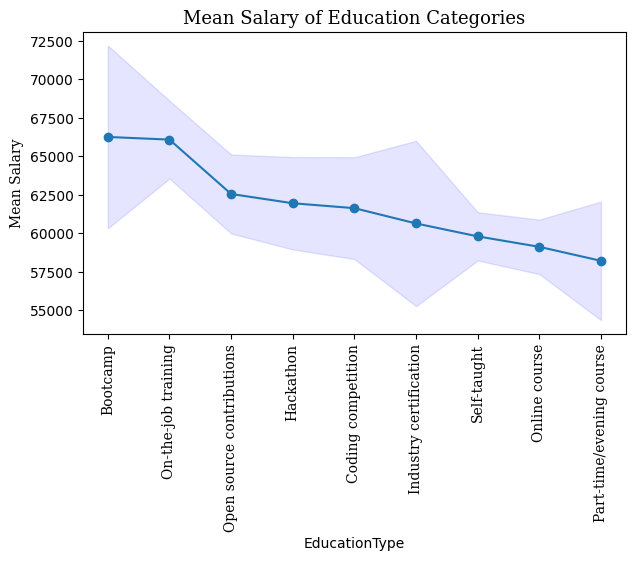

In [121]:
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.subplot(1, 1, 1)
ds_edu_salary_agg_df['mean'].plot(style='o-')
plt.fill_between(ds_edu_salary_agg_df.index, ds_edu_salary_agg_df['lower_95'],
                 ds_edu_salary_agg_df['upper_95'], color='b', alpha=.1)
plt.xticks(rotation=90, fontfamily='serif')
plt.title('Mean Salary of Education Categories', fontfamily='serif',
          fontsize=13, fontweight='light')
plt.ylabel('Mean Salary', fontfamily='serif');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('imgs/ds_eduation_mean_salary.png', bbox_inches = "tight")

## Conclusion

First of all we can see the education with the highest mean salary is Bootcamps. We know that bootcamps are expensive, and it makes sense that a developer with a high salary can get into a bootcamp. It might also mean that bootcamps set you up for better oppurtunities. But since there is great uncertainty to where the true mean lies, we can't verify that and it seems to good to be true.

We can see right next to it is on-the-job training, which kind of makes sense as this indicates that data scientists in companies that pay top dollar would recieve training specific to the tools used within the company.

Then we have open source contributions, hackathons and coding competition right next to each other, with slightly decreasing means and slightly increasing uncertainty. This trio definetly speaks of the data scientists practical ability, and if you remember, their trends we going up, which indicates how important they are in determining the kind of job and salary you are going to land. 

What seems interesting is that they are followed by industry certifications, and how uncertainty just increases beyond the last 3 educational methods. I think this speaks of how industry certifications aren't really guranteed to get you a good salary.


And from there we how the remaining educational sources are rated, where self-education, online classes and part-time courses are in the bottom of the list.

So what can we learn from this? I think we can learn that one should focus the practical side more than the theoritical side. 

Proving that you are competent through open source contributions, hackathons, competitions, projects portfolio (which is what you get from a bootcamp) are the way to go.

You should also utilize online and part-time courses, but no the point where they take up all of your time and you don't have anything to show for it.

###3. Is salary the reason of job dissatisfaction or are there other reasons?

## Business Understanding

This question is imporant in understanding what statisfies and dissatisfies developers in their jobs.

## Data Understanding

I'll use 2019 survey data for answering this question, since it's the most recent survey that contains this information.

Let's look into how salary is related to job satisfaction.

Text(0, 0.5, 'Salary')

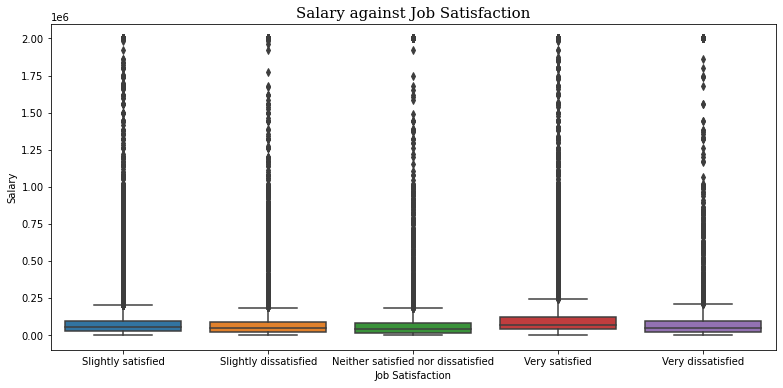

In [122]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.boxplot(x='JobSat', y='ConvertedComp', data=df_2019, ax=ax);
ax.set_title('Salary against Job Satisfaction', fontdict={'fontfamily': 'serif',
                                                          'fontsize': 15});
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Salary')

## Data Preparation

Let's clean the salary from outliers to get better results.

In [123]:
def clean_column(df, column, remove_outliers=True):
    """Function to drop na values from a column and remove outliers."""
    tmp = df.dropna(subset=[column])
    if remove_outliers:
        less_than_q90 = tmp[column] < tmp[column].quantile(0.9)
        more_than_q10 = tmp[column] > tmp[column].quantile(0.1)
        tmp = tmp[less_than_q90 & more_than_q10]
    return tmp

cleaned_salary_df_2019 = clean_column(df_2019, 'ConvertedComp')

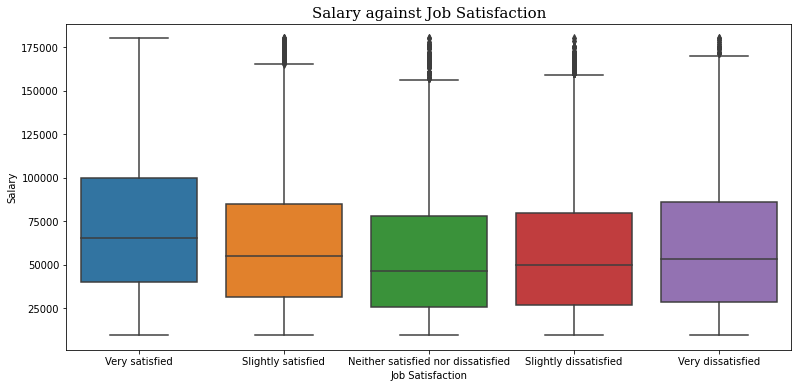

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
jobsat_order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied',
        'Slightly dissatisfied', 'Very dissatisfied']
sns.boxplot(x='JobSat', y='ConvertedComp', data=cleaned_salary_df_2019,
            order=jobsat_order)
ax.set_title('Salary against Job Satisfaction', fontdict={'fontfamily': 'serif',
                                                          'fontsize': 15});

ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Salary')
plt.savefig('imgs/salary_vs_js.png', bbox_inches = "tight")

There is a weird pattern in here, where the we see the median falls down as the satisfaction decreases, then it bounces back up when dissatisfaction increases. Which indicates the absence of a linear correlation between job satisfaction and salary.

It rather paints a different picture of a developer who might have taken a new position at another company, or chosen a career path based on salary alone, and then got to the point of dissatisfaction with the job.

But what are these factors that make a developer dissatified with his job?

What are the challenges that he/she faces?

In [125]:
def pivot_and_plot(df, columns_list, orders_list=[[], []], percentage_dim=2,
                   figsize=(10, 4), plot=True, annot=True, cbar=False):
    """Function to pivot a dataframe into a contingency table and uses it to 
    plot a heatmap"""
    pivot_table = df.pivot_table(index=columns_list[0], columns=columns_list[1],
                                 aggfunc='size')
    if orders_list[0]:
        pivot_table = pivot_table.loc[orders_list[0], :]
    if orders_list[1]:
        pivot_table = pivot_table.loc[:, orders_list[1]]

    if percentage_dim < 2:
        pivot_table = pivot_table.apply(lambda x: x/x.sum(), axis=percentage_dim)
        fmt = '.1%'
    else:
        fmt = 'd'

    if plot:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        sns.heatmap(pivot_table,
                cmap="Blues",
                square=True, 
                linewidth=2.5, 
                cbar=cbar,
                annot=annot, 
                fmt=fmt,
                ax=ax
            )
        return ax
    else:
        return pivot_table

### Data Preparation

Since the challenges column has the format of multiple values separated by commas, we need to split them. But since we want to understand the relationship of job satisfaction with these challenges, we'll have to split each challenges row and repeat the job satisfaction row value with it according the number of values in the challenges row.

Then we'll make a pivot table to understand the frequencies and percentages of the job satisfaction with work challenges.

In [134]:
def split_and_repeat(df, columns):
    """Function to split a series that has multiple values separated by commas
    in each row, and repeat another column according to the number of values in 
    the series to split."""
    tmp = df.dropna(subset=columns, how='any')
    tmp = pd.DataFrame({
        columns[1]: split_and_chain(tmp[columns[1]]),
        columns[0]: tmp[columns[0]].repeat(tmp[columns[1]].str.split(';').apply(len))
    })
    return tmp



In [135]:
df_job_work = split_and_repeat(df_2019, ['JobSat', 'WorkChallenge'])
df_job_work.head()

,WorkChallenge,JobSat
2,Distracting work environment,Slightly satisfied
2,Inadequate access to necessary tools,Slightly satisfied
2,Lack of support from management,Slightly satisfied
4,Being tasked with non-development work,Slightly dissatisfied
4,Inadequate access to necessary tools,Slightly dissatisfied


In [136]:
pivot_table = pivot_and_plot(df_job_work, ['JobSat', 'WorkChallenge'], [jobsat_order, []], 1, plot=False)

In [161]:
pivot_table

WorkChallenge,Being tasked with non-development work,Distracting work environment,Inadequate access to necessary tools,Lack of support from management,Meetings,"Non-work commitments (parenting, school work, hobbies, etc.)",Not enough people for the workload,Time spent commuting,Toxic work environment
JobSat,,,,,,,,,
Very satisfied,0.144104,0.165050,0.073601,0.066903,0.166638,0.102522,0.138026,0.083009,0.060147
Slightly satisfied,0.143624,0.166617,0.083648,0.099645,0.143757,0.075758,0.134258,0.081626,0.071066
Neither satisfied nor dissatisfied,0.138639,0.156426,0.087400,0.125231,0.128978,0.064196,0.121033,0.083743,0.094352
Slightly dissatisfied,0.139036,0.159962,0.086880,0.142141,0.116134,0.055579,0.124109,0.072659,0.103501
Very dissatisfied,0.133365,0.147341,0.087446,0.143667,0.119230,0.052468,0.113480,0.066044,0.136959


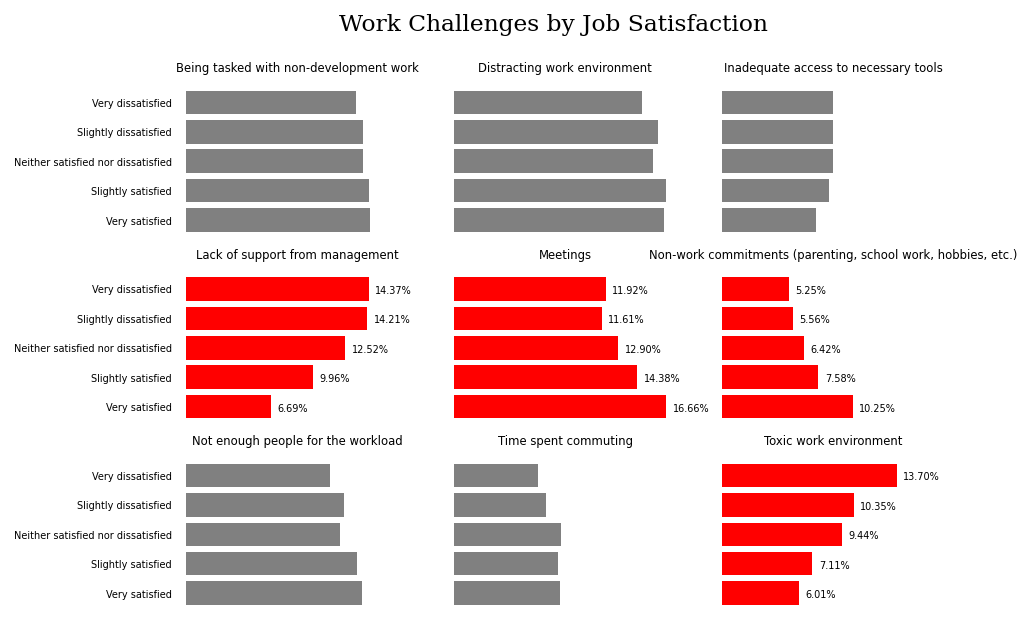

In [237]:
jobsat_challenges = pivot_table.reset_index()

fig, axes = plt.subplots(3, 3, figsize=(7, 5), sharey=True, sharex=True, dpi=140)
fig.suptitle('Work Challenges by Job Satisfaction', fontfamily='serif')
axes = axes.flatten()

emphasize = [3, 4, 5, 8]

for i, challenge in enumerate(pivot_table.columns):
    if i in emphasize:
        color = 'red'
    else:
        color = 'grey'
    rects = axes[i].barh(range(5), pivot_table[challenge], color=color)
    
    axes[i].set_title(challenge, fontsize=6)
    axes[i].set_yticks(range(5))
    axes[i].set_yticklabels(jobsat_challenges['JobSat'], fontsize=5)
    axes[i].tick_params(bottom=False, left=False, labelbottom=False)

    for spine in ['top', 'bottom', 'left', 'right']:
        axes[i].spines[spine].set_visible(False)

    if i in emphasize:
        for rect in rects:
            width = rect.get_width()
            pct = '{0:.2f}%'.format(width*100)
            axes[i].text(width+0.005, rect.get_y()+0.25, pct, color='black',
                         fontweight='light', fontsize=5)
    
plt.savefig('imgs/jobsat_challenges.png', bbox_inches='tight')

### Data Modelling

The percentage of developers facing lack of support from management seems to decrease as satisfaction increases. Which indicates that lack of support from management defines a bad work experience, where the increase in answers from very dissatisfied developers differs from very satisfied by 53.5%.

Very satisfied developers list meetings as one the challenges of work, which means that they are more invloved, and this percentage of developers seeing this as a challenger decreases with decreased satisfaction, which doesn't mean that meetings make employees satisfied per se, but means that dissatisfaction might be related to feeling left out from the work environment.

It also seems that very satisfied developers tend to have more non-work commitments than developers on the other side of the spectrum, with an increase of 49.5%.

Then we have toxic work environment, where very dissatified developers have a 56% increase over very satisfied developers.

What doesn't seem to really matter is being tasked with non-development work, distracting work environment, inadequate access to tools, not enough people for the workload and time spent commuting.

So we can summarise here that a satisifed developer is one who is involved is supported by management, gets to contribute in his work environment, has some work-life balance, has nice colleagues and can have challenges from the ones that don't matter decrease satisfaction.

While a dissatisfied developer is one that isn't much supported by management, feels left out from his work enviroment, might not have many commitments outside of work, and has a bunch of toxic colleagues.

Therefore we can conclude that dissatified developers do meet different challenges than satisified developers, and that's why they are dissatisfied in the first place.

There is a 25% increase in percentage of developers who prefer working remotely when compared to satisfied developers. 

So it might be that dissatisfied developers prefer working remotely, but their jobs doesn't allow them. 

Or it might be that some developers get dissatisfied with their job to the point of wanting to avoid going to work, and stick with being remote.

And I don't think that it has to be one or the other, it could be both of them at the same time.

We can check the second one by looking into the percentages of dissatisfied developers who won't to work remotely in each remote work category stated.

## Conclusion

1. The market got more competitive over years, where the proportion of developers with no CS background shrank due to the increase of CS undergraduates.

2. The most accurate salary correlated alternative education means aren't online courses and part-time programs, but rather practical and competitive ones such as open source contributions and hackathons and coding competitions.

3. There is no linear relationship between salary and job satisfaction

4. Dissatified and satisifed developers state some challenges that they face at work at strikingly different proportions, which might indicate their contribution in their satisfaction with the job


I don't think that this analysis scratched the surface of what could be analysed with these dataset, and there are certainly more depth to the questions that I asked, and different questions that can lead to more insights.

Thanks for reading.